# Project Introduction

## Project motivation
Airbnb is an online marketplace that connects hosts who are looking to rent out their homes with guests looking for a place to stay. We recognised that this platform works 2-ways - both guests and hosts must benefit from it for it to work out. 

While we regularly think about how we, as guests, can maximise our utility and choose the most "worth-it" property, we wanted to consider another perspective - that is, how do hosts maximise their utility as well when offering their property to others?

The goal of our project is thus to help airbnb hosts make the most of their property by providing some insights.

We make use of the Amsterdam airbnb dataset from kaggle found here: https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam?select=reviews_details.csv

## Questions
**Main question:**
How does a airbnb host maximise their property? 

**Sub questions:**
1. What is a reasonable rent for a particular listing?
2. Where is the ideal area for listings?
3. What factors will affect the number of bookings?
4. What ratings would a listing get?

Firstly, we want to find out what a reasonable rent is for any particular listing. This will allow a host to be more knowledgeable about what rent to offer.

We noticed that there were a number of neighbourhoods in the region we chose, with some having more listings than others. We hence wanted to know what the ideal area for a host to put up a listing is. 

We used number of bookings to approximate the popularity of a listing. We wanted to identify characteristics of popular listings so that a potential host can offer them as well. 

Ratings are something that guests look at closely when choosing a property to rent. It is hence important for the host to keep their ratings up. We want to explore what ratings a listing would get based on its characteristics. 

# EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

notesData=pd.read_csv('gdrive/My Drive/SC1015/listings_details.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (27,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
notesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20030 non-null  int64  
 1   listing_url                       20030 non-null  object 
 2   scrape_id                         20030 non-null  float64
 3   last_scraped                      20030 non-null  object 
 4   name                              19992 non-null  object 
 5   summary                           19510 non-null  object 
 6   space                             14579 non-null  object 
 7   description                       19906 non-null  object 
 8   experiences_offered               20030 non-null  object 
 9   neighborhood_overview             13257 non-null  object 
 10  notes                             9031 non-null   object 
 11  transit                           13635 non-null  object 
 12  acce

**Cleaning Data**


*   Chose certain columns to keep as the others are not important
*   Separating the numerical and catergorical data
*   Removing the '$' of price so that it is numeric only



In [ ]:
#Extract relevant "object" and numeric columns
cat_data = pd.DataFrame(data = notesData, columns = ["host_response_time","host_is_superhost","property_type","neighbourhood_cleansed","bed_type","room_type","cancellation_policy"])
num_data = pd.DataFrame(data = notesData, columns = ["id","longitude","latitude","price","security_deposit","cleaning_fee","guests_included","extra_people",\
                                                     "accommodates","bathrooms","bedrooms","beds","number_of_reviews","review_scores_rating","review_scores_accuracy",\
                                                    "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])
#Combine data and drop rows with NaN values
combined_data = pd.concat([cat_data,num_data],axis=1)

#Format data to remove $ and %
remove_price = ['security_deposit','cleaning_fee','extra_people']
for var in remove_price:
    combined_data[var] = combined_data[var].astype(str)
    combined_data[var] = combined_data[var].str.replace("[$, ]", "")
    combined_data[var] = combined_data[var].astype(float)
    combined_data[var] = combined_data[var].fillna(0)

#Format price to remove $
var='price'
combined_data[var] = combined_data[var].astype(str)
combined_data[var] = combined_data[var].str.replace("[$, ]", "")
combined_data[var] = combined_data[var].astype(float)


combined_data = combined_data.dropna()
combined_data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9508 entries, 0 to 20007
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9508 non-null   object 
 1   host_is_superhost            9508 non-null   object 
 2   property_type                9508 non-null   object 
 3   neighbourhood_cleansed       9508 non-null   object 
 4   bed_type                     9508 non-null   object 
 5   room_type                    9508 non-null   object 
 6   cancellation_policy          9508 non-null   object 
 7   id                           9508 non-null   int64  
 8   longitude                    9508 non-null   float64
 9   latitude                     9508 non-null   float64
 10  price                        9508 non-null   float64
 11  security_deposit             9508 non-null   float64
 12  cleaning_fee                 9508 non-null   float64
 13  guests_included  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
max(combined_data['price'])

5040.0

In [ ]:
min(combined_data['price'])

0.0

**Cleaning the data**

From the data, we can see that some of the prices of the airbnb are unreasonable or that it does not make sense. Renting a room for 5040 dollar per night is a unreasonable price while having a price 0 dollar which means the rooms are free is not possible as well. We removed those airbnb that has unreasonable price by setting a limit on the maximum price of $999 and not free.

In [ ]:
combined_data = combined_data[combined_data['price']<1000]
combined_data = combined_data[combined_data['price']>0]
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497 entries, 0 to 20007
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9497 non-null   object 
 1   host_is_superhost            9497 non-null   object 
 2   property_type                9497 non-null   object 
 3   neighbourhood_cleansed       9497 non-null   object 
 4   bed_type                     9497 non-null   object 
 5   room_type                    9497 non-null   object 
 6   cancellation_policy          9497 non-null   object 
 7   id                           9497 non-null   int64  
 8   longitude                    9497 non-null   float64
 9   latitude                     9497 non-null   float64
 10  price                        9497 non-null   float64
 11  security_deposit             9497 non-null   float64
 12  cleaning_fee                 9497 non-null   float64
 13  guests_included  

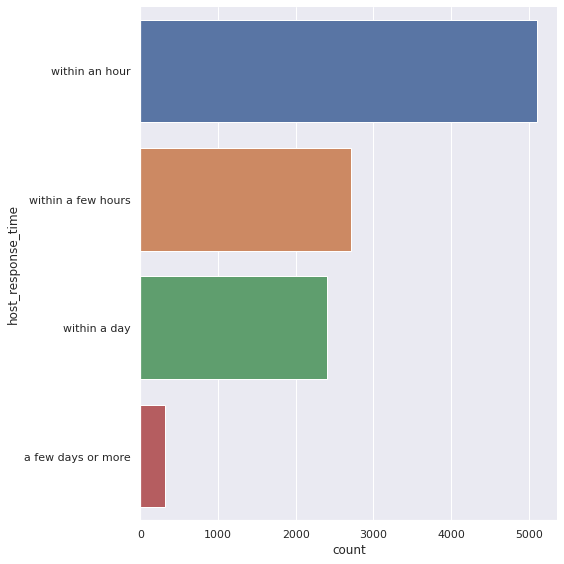

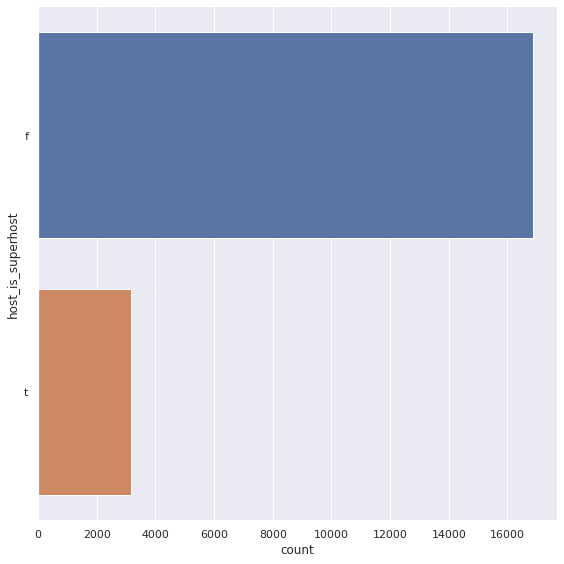

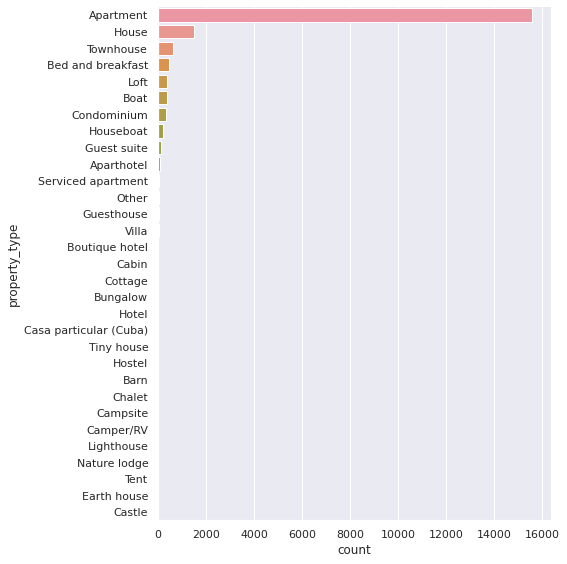

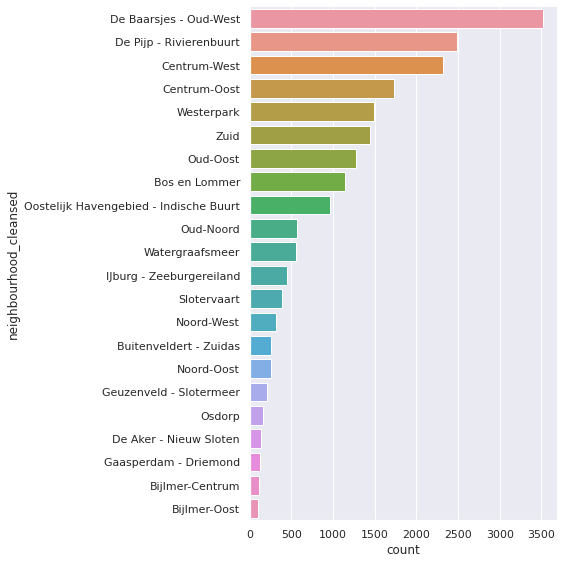

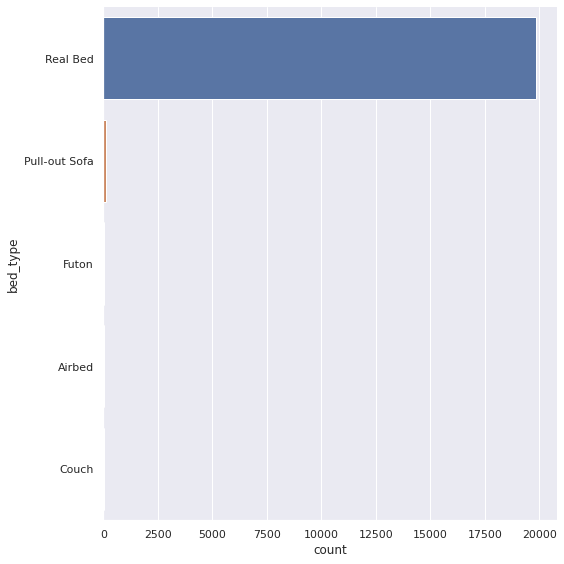

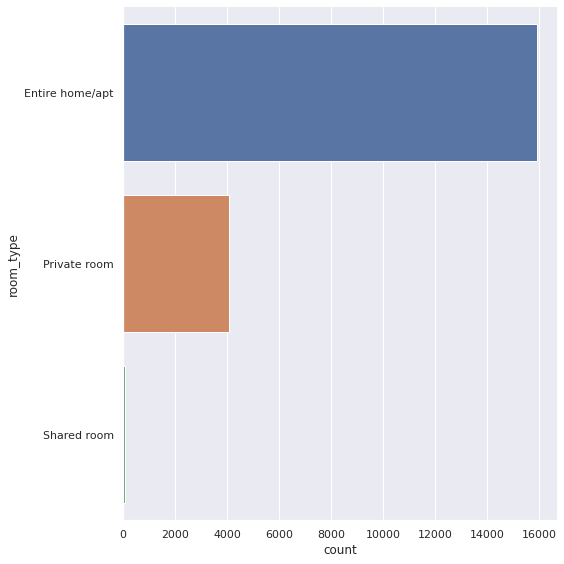

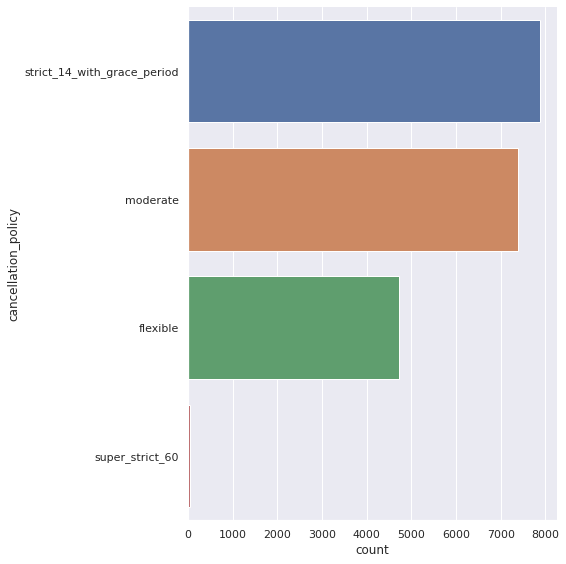

In [ ]:
#visualise categorical data
for var in cat_data:
    sb.catplot(y = var, data = cat_data, kind = 'count', 
               order = cat_data[var].value_counts().index, height = 8)

# Q1: What is a reasonable price?

In [ ]:
num_data

id  longitude   latitude    price security_deposit cleaning_fee  \
0          2818   4.941419  52.365755   $59.00          $100.00       $50.00   
1          3209   4.873924  52.390225  $160.00          $300.00       $40.00   
2         20168   4.893541  52.365087   $80.00              NaN          NaN   
3         25428   4.883668  52.373114  $125.00          $300.00       $40.00   
4         27886   4.892078  52.386727  $150.00            $0.00        $0.00   
...         ...        ...        ...      ...              ...          ...   
20025  30576148   4.952145  52.345999  $340.00          $500.00       $60.00   
20026  30577727   4.932467  52.362412  $150.00            $0.00       $25.00   
20027  30578037   4.926912  52.362431   $80.00              NaN          NaN   
20028  30579673   4.932493  52.363780   $55.00              NaN          NaN   
20029  30580413   4.901932  52.346911  $220.00            $0.00       $30.00   

       guests_included extra_people  accommodates  bathrooms  ...  beds  \
0                    1       $20.00             2        1.5  ...   2.0   
1                    2       $15.00             5        1.0  ...   2.0   
2                    2        $0.00             2        1.0  ...   1.0   
3                    2       $10.00             3        1.0  ...   1.0   
4                    1        $0.00             2        1.0  ...   1.0   
...                ...          ...           ...        ...  ...   ...   
20025                1        $0.00             4        2.0  ...   4.0   
20026                1        $0.00             3        1.0  ...   3.0   
20027                1        $0.00             2        1.0  ...   1.0   
20028                1        $0.00             2        1.0  ...   1.0   
20029                1        $0.00             4        1.0  ...   2.0   

       number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                    248                  97.0                    10.0   
1                     42                  96.0                    10.0   
2                    233                  87.0                     9.0   
3                      1                 100.0                    10.0   
4                    171                  99.0                    10.0   
...                  ...                   ...                     ...   
20025                  0                   NaN                     NaN   
20026                  0                   NaN                     NaN   
20027                  0                   NaN                     NaN   
20028                  0                   NaN                     NaN   
20029                  0                   NaN                     NaN   

       review_scores_cleanliness  review_scores_checkin  \
0                           10.0                   10.0   
1                            9.0                   10.0   
2                           10.0                    9.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
20025                        NaN                    NaN   
20026                        NaN                    NaN   
20027                        NaN                    NaN   
20028                        NaN                    NaN   
20029                        NaN                    NaN   

       review_scores_communication  review_scores_location  \
0                             10.0                     9.0   
1                             10.0                     9.0   
2                              9.0                    10.0   
3                             10.0                    10.0   
4                             10.0                    10.0   
...                            ...                     ...   
20025                          NaN                     NaN   
20026                          NaN                     Na

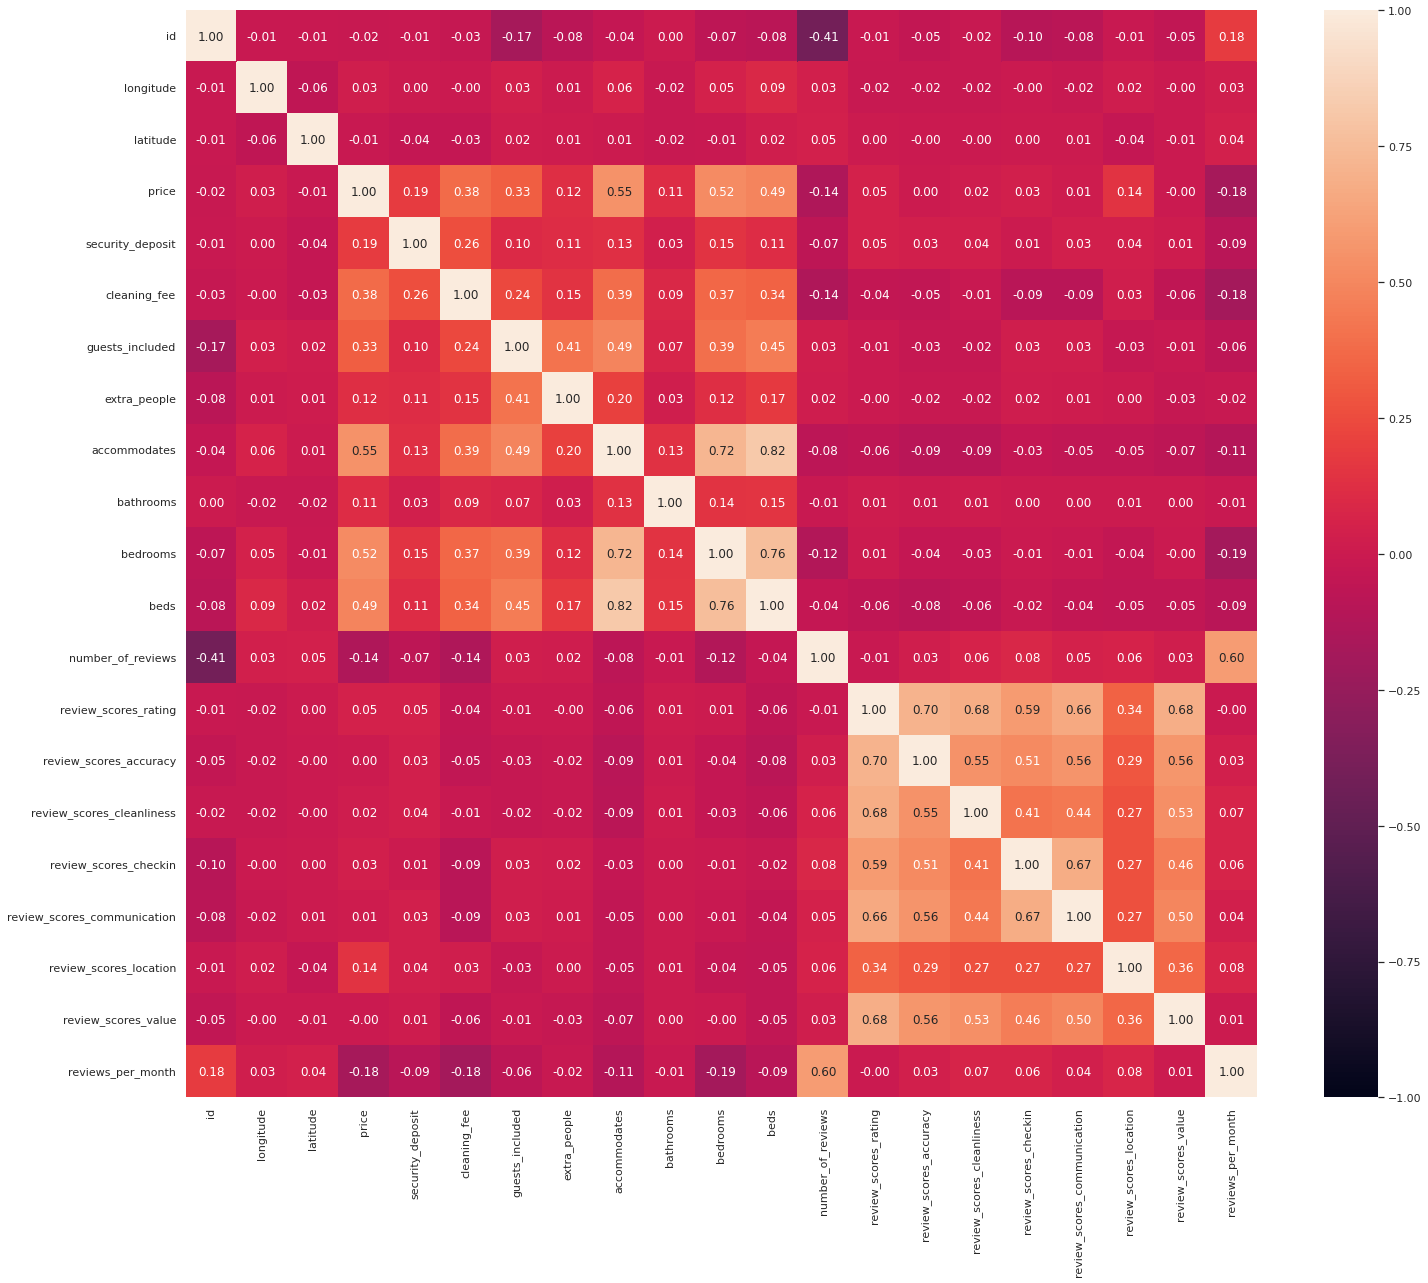

In [ ]:
cat_data = pd.DataFrame(data = combined_data, columns = ["host_response_time","host_is_superhost","property_type","neighbourhood_cleansed","bed_type","room_type","cancellation_policy"])
num_data = pd.DataFrame(data = combined_data, columns = ["id","longitude","latitude","price","security_deposit","cleaning_fee","guests_included","extra_people",\
                                                     "accommodates","bathrooms","bedrooms","beds","number_of_reviews","review_scores_rating","review_scores_accuracy",\
                                                    "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])

num_data = num_data.astype("float64")

f = plt.figure(figsize=(24,20))
sb.heatmap(num_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

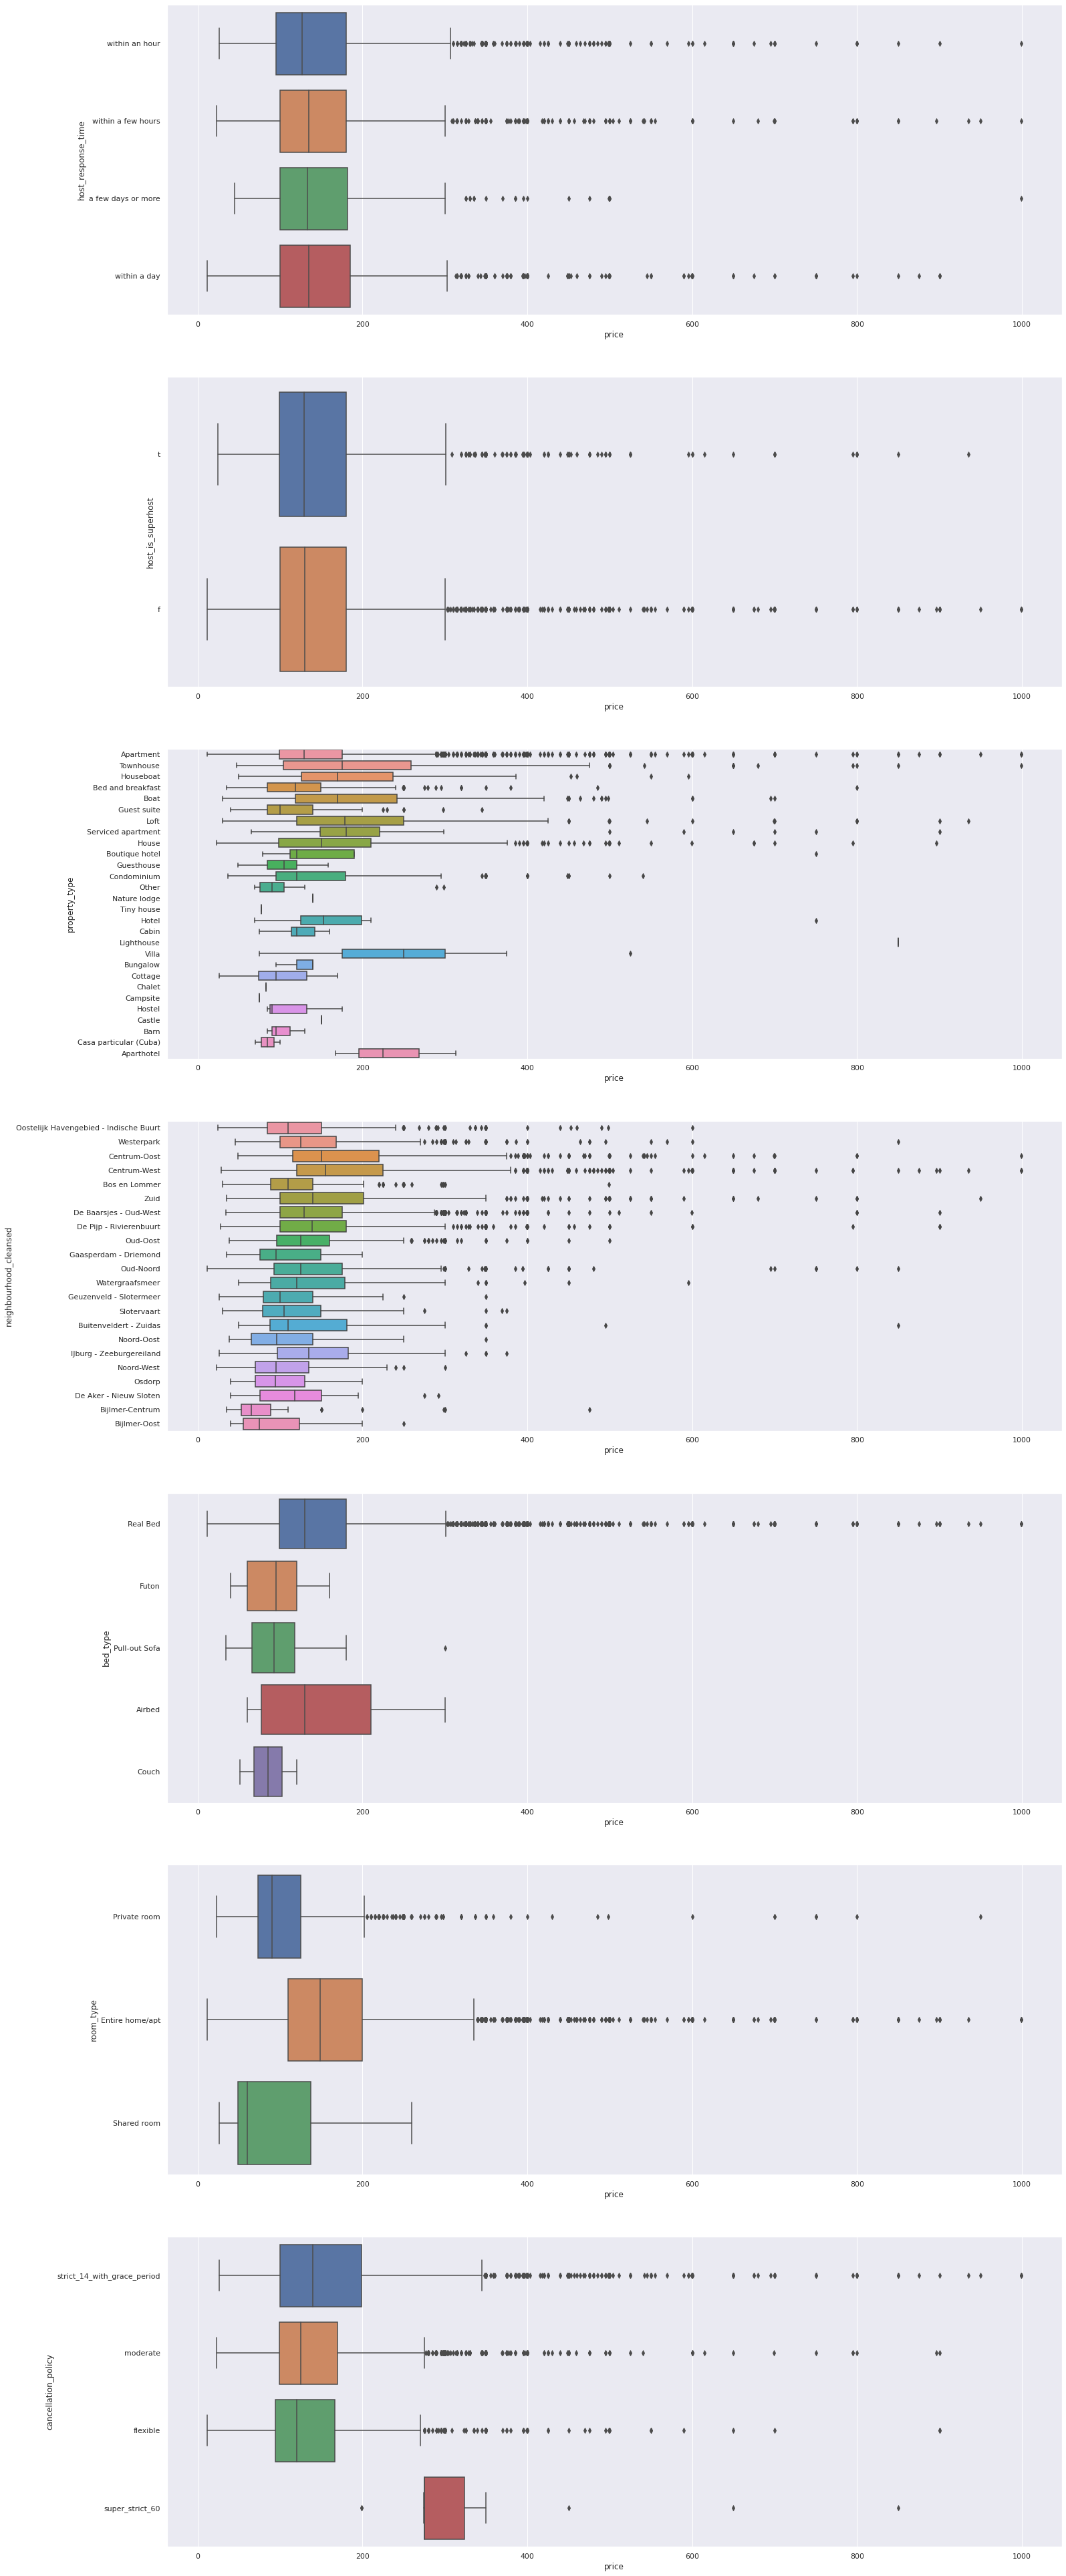

In [ ]:
#Visualise categorical variables with price to check for possible relationship
#Boxplots for all categorical variables against the price
f, axes = plt.subplots(7, 1, figsize=(24,70))
count=0
for var in cat_data:
    sb.boxplot(x = 'price', y = var, data = combined_data, ax = axes[count])
    count+=1

In [ ]:
print (combined_data["neighbourhood_cleansed"].value_counts())

De Baarsjes - Oud-West                    1768
Centrum-West                              1401
De Pijp - Rivierenbuurt                   1224
Centrum-Oost                               982
Westerpark                                 728
Zuid                                       591
Oud-Oost                                   585
Bos en Lommer                              540
Oostelijk Havengebied - Indische Buurt     428
Oud-Noord                                  288
Slotervaart                                170
Watergraafsmeer                            168
Noord-West                                 134
Buitenveldert - Zuidas                     100
IJburg - Zeeburgereiland                    99
Noord-Oost                                  96
Geuzenveld - Slotermeer                     68
Osdorp                                      44
Bijlmer-Centrum                             34
De Aker - Nieuw Sloten                      22
Gaasperdam - Driemond                       19
Bijlmer-Oost 

In [ ]:
print (combined_data["property_type"].value_counts())

Apartment                 7285
House                      505
Bed and breakfast          335
Townhouse                  301
Loft                       257
Boat                       228
Condominium                158
Houseboat                  154
Guest suite                112
Serviced apartment          48
Guesthouse                  23
Other                       19
Boutique hotel              15
Villa                       13
Cottage                      7
Cabin                        7
Bungalow                     7
Hotel                        6
Barn                         3
Hostel                       3
Aparthotel                   3
Casa particular (Cuba)       2
Chalet                       1
Campsite                     1
Lighthouse                   1
Castle                       1
Nature lodge                 1
Tiny house                   1
Name: property_type, dtype: int64


**Cleaning Data for category data**


*   Remove the null rows

*   Removing neighbourhoods and property types with low counts


*   Indexing each neighbourhood and property types for correlation with numeric data



In [ ]:
cleanup_df=combined_data
#Extra data and drop NaN values'
temp_df = pd.DataFrame(combined_data[['bathrooms','bedrooms','beds','accommodates']])
temp_df = temp_df.astype("int64")
cleanup_df = pd.DataFrame(combined_data[['price','room_type','property_type','neighbourhood_cleansed','bed_type','cleaning_fee','guests_included']])
cleanup_df = pd.concat([cleanup_df,temp_df],axis=1)
cleanup_df = cleanup_df.dropna(how='any')

#Remove categories with low counts
propertytype = ["Tiny house","Nature lodge","Castle","Lighthouse","Campsite","Chalet","Casa particular (Cuba)","Hostel","Aparthotel","Barn","Hotel","Bungalow","Cabin","Cottage","Villa","Boutique hotel","Other","Guesthouse","Serviced apartment","Guest suite","Houseboat","Condominium"]
for ptype in propertytype:
    cleanup_df = cleanup_df[cleanup_df["property_type"]!=ptype]

#Remove categories with low counts 
neighbourhoodtype = ["Bijlmer-Oost","Gaasperdam - Driemond","De Aker - Nieuw Sloten","Bijlmer-Centrum","Osdorp"]
for ntype in neighbourhoodtype:
    cleanup_df = cleanup_df[cleanup_df["neighbourhood_cleansed"]!=ntype]

#Remove categories with low counts
cleanup_df = cleanup_df[cleanup_df["bed_type"]!="Airbed"]
cleanup_df = cleanup_df[cleanup_df["bed_type"]!="Couch"]

#Encode categorical data with numeric values
cleanup_df_dict = {"room_type":{"Entire home/apt": 3, "Private room": 2,"Shared room":1},
                   "property_type":{"Boat":2,"Loft":4,"Townhouse":1,"Bed and breakfast":5,"House":3,"Apartment":6},
                   "bed_type":{"Real Bed":2,"Futon":1,"Pull-out Sofa":1},
                   "neighbourhood_cleansed":{"Geuzenveld - Slotermeer": 0, "Noord-Oost":1,"IJburg - Zeeburgereiland":2,"Buitenveldert - Zuidas":3,"Noord-West":4, "Watergraafsmeer":5,"Slotervaart":6,"Oud-Noord":7,"Oostelijk Havengebied - Indische Buurt":8,"Bos en Lommer":9,"Oud-Oost":10,"Zuid":11,"Westerpark":12,"Centrum-Oost":13,"De Pijp - Rivierenbuurt":14,"Centrum-West":15,"De Baarsjes - Oud-West":16}}
                   
cleanup_df.replace(cleanup_df_dict, inplace=True)

#create a copy for future use
cleanup_df_copy = cleanup_df


cleanup_df.corr()

price  room_type  property_type  \
price                   1.000000   0.288230      -0.165567   
room_type               0.288230   1.000000       0.116265   
property_type          -0.165567   0.116265       1.000000   
neighbourhood_cleansed  0.136058   0.029542       0.178388   
bed_type                0.065223   0.071153      -0.030414   
cleaning_fee            0.377760   0.263563      -0.104619   
guests_included         0.327478   0.114313      -0.141735   
bathrooms               0.323784   0.086836      -0.179206   
bedrooms                0.523804   0.234580      -0.272466   
beds                    0.485738   0.142850      -0.289701   
accommodates            0.559402   0.227739      -0.225991   

                        neighbourhood_cleansed  bed_type  cleaning_fee  \
price                                 0.136058  0.065223      0.377760   
room_type                             0.029542  0.071153      0.263563   
property_type                         0.178388 -0.030414     -0.104619   
neighbourhood_cleansed                1.000000  0.015620      0.061675   
bed_type                              0.015620  1.000000      0.032983   
cleaning_fee                          0.061675  0.032983      1.000000   
guests_included                      -0.012535  0.020627      0.234528   
bathrooms                            -0.002873  0.026449      0.233061   
bedrooms                             -0.090103  0.052283      0.355845   
beds                                 -0.095897  0.046745      0.330190   
accommodates                         -0.064710  0.057615      0.373468   

                        guests_included  bathrooms  bedrooms      beds  \
price                          0.327478   0.323784  0.523804  0.485738   
room_type                      0.114313   0.086836  0.234580  0.142850   
property_type                 -0.141735  -0.179206 -0.272466 -0.289701   
neighbourhood_cleansed        -0.012535  -0.002873 -0.090103 -0.095897   
bed_type                       0.020627   0.026449  0.052283  0.046745   
cleaning_fee                   0.234528   0.233061  0.355845  0.330190   
guests_included                1.000000   0.162017  0.392529  0.448620   
bathrooms                      0.162017   1.000000  0.395131  0.352336   
bedrooms                       0.392529   0.395131  1.000000  0.762541   
beds                           0.448620   0.352336  0.762541  1.000000   
accommodates                   0.490707   0.324792  0.725910  0.816292   

                        accommodates  
price                       0.559402  
room_type                   0.227739  
property_type              -0.225991  
neighbourhood_cleansed     -0.064710  
bed_type                    0.057615  
cleaning_fee                0.373468  
guests_included             0.490707  
bathrooms                   0.324792  
bedrooms                    0.725910  
beds                        0.816292  
accommodates                1.000000

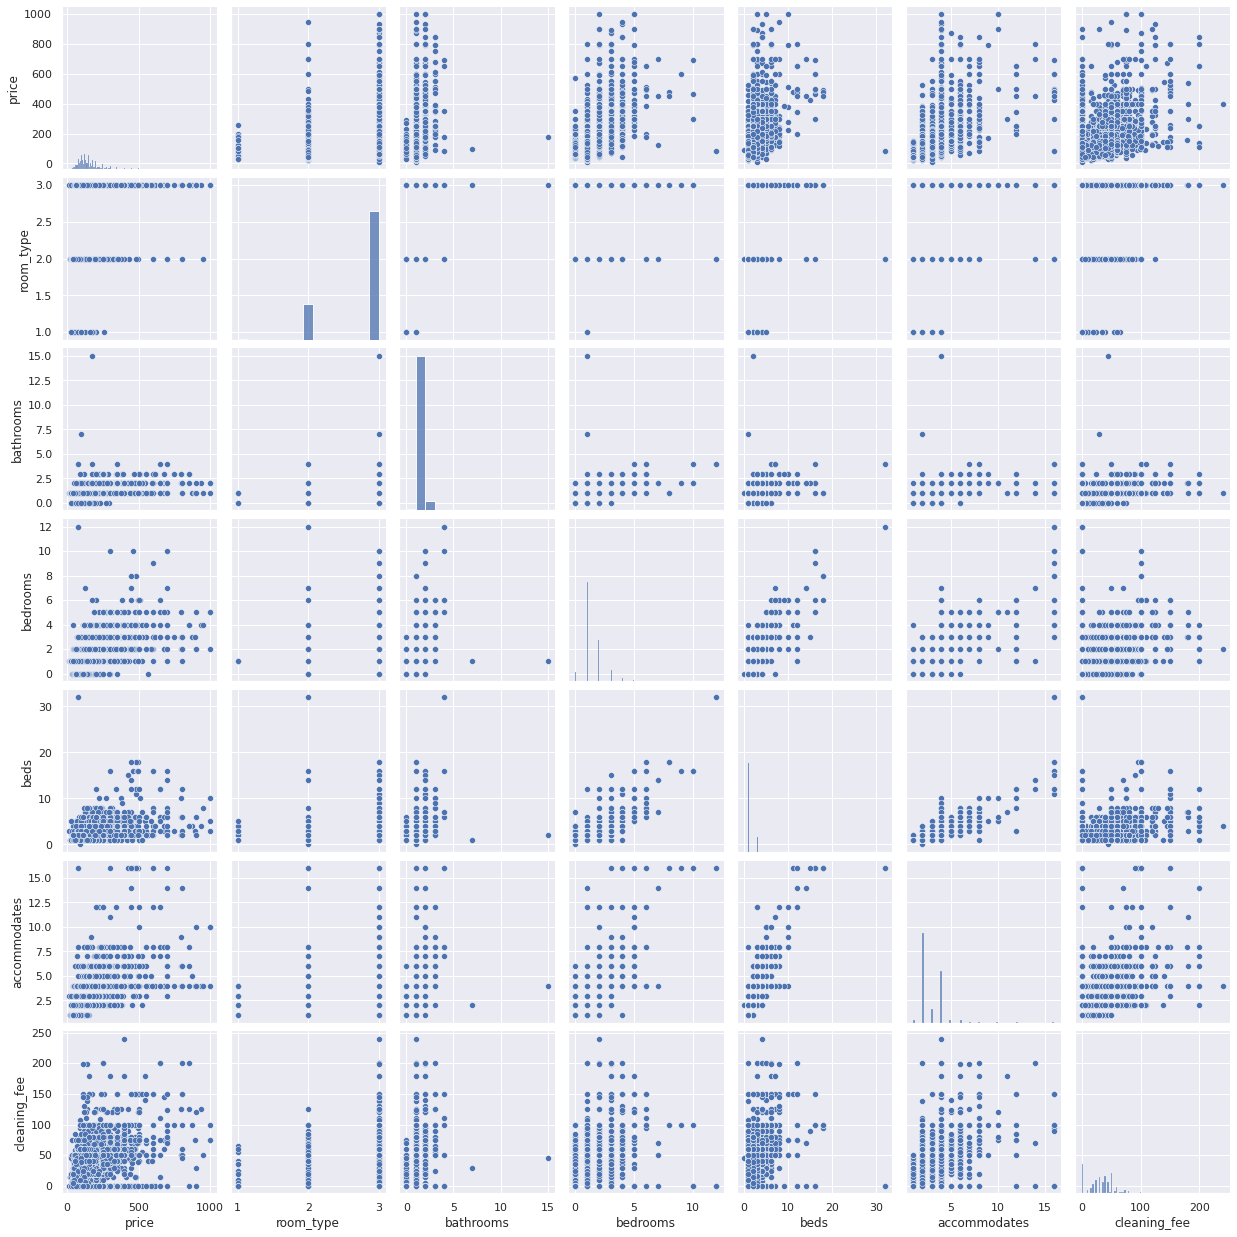

In [ ]:
#Extract variables for price prediction
cleanup_df = pd.DataFrame(cleanup_df[['price','room_type','bathrooms','bedrooms','beds','accommodates','cleaning_fee']])
cleanup_df=cleanup_df.dropna(how='any')
y = pd.DataFrame(cleanup_df["price"])
X = pd.DataFrame(cleanup_df[['room_type','bathrooms','bedrooms','beds','accommodates','cleaning_fee']])

# Relationship between Response and the Predictors
sb.pairplot(data = cleanup_df)

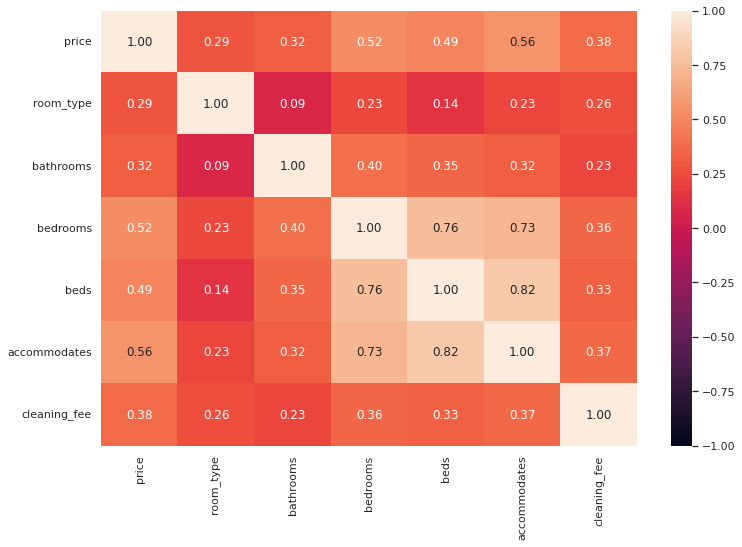

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(cleanup_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

**Comparing Correlation**



*  Comparing the price against other variables, price has moderately strong correlation with bedrooms, beds and accomodates. There seems to be a relationship between those variables and price.
*   On the other hand, price has a weak relationship bed_type and property_type and neighbourhood_cleasned






## Using Linear Regression to Predict Price

In [ ]:
#Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Train Set : (6588, 1) (6588, 6)
Test Set  : (2196, 1) (2196, 6)
Intercept of Regression 	: b =  [-66.56034895]
Coefficients of Regression 	: a =  [[27.62401391 39.92868321 14.7367559   1.49666816 21.65590212  0.45017913]]



Predictors  Coefficients
0     room_type     27.624014
1     bathrooms     39.928683
2      bedrooms     14.736756
3          beds      1.496668
4  accommodates     21.655902
5  cleaning_fee      0.450179

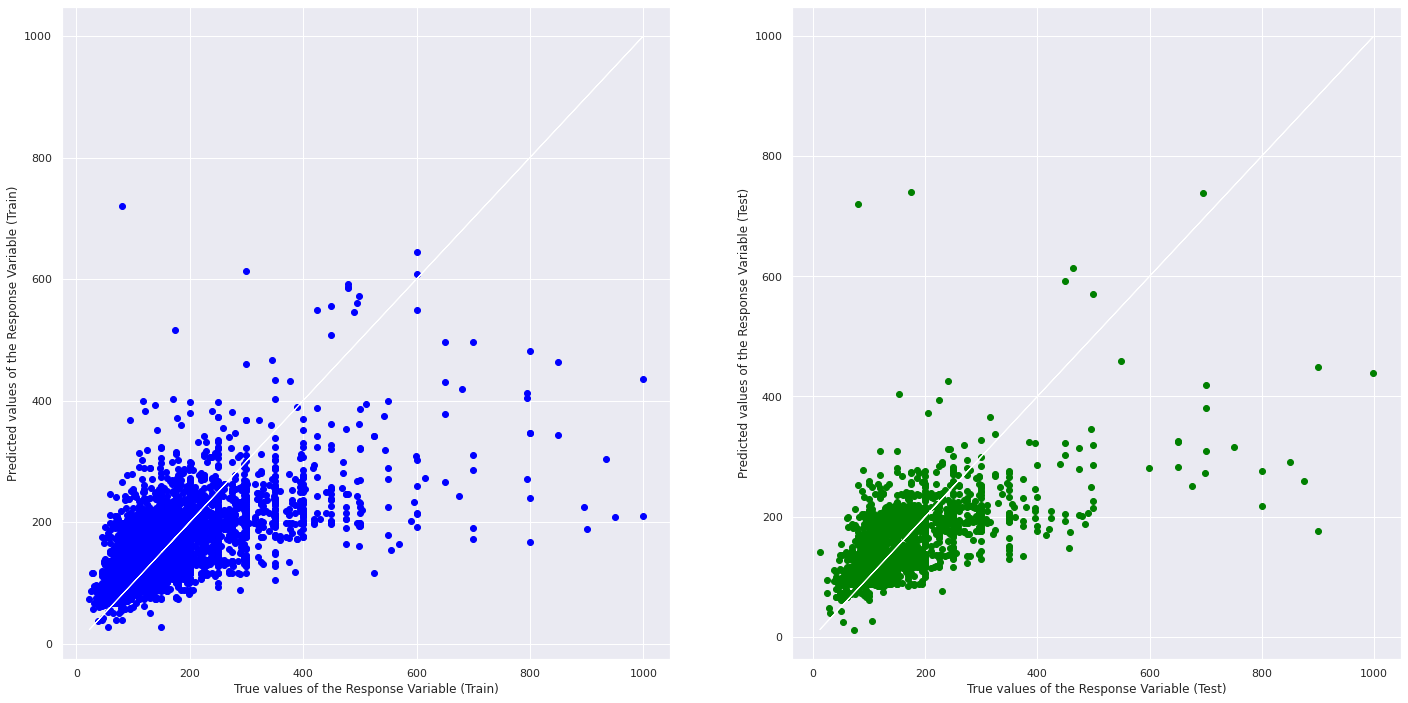

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3957206118389772
Mean Squared Error (MSE) 	: 4843.303447760868

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3764696053928268
Mean Squared Error (MSE) 	: 5453.565177158799



In [ ]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [ ]:
#the order of costs are explained variance for train and test, and mse for train and test
cost_linreg = {"R^2_train":0,"R^2_test":0,"MSE_train":0,"MSE_test":0}
num_iterations = 10
# Check value of explained variance for test and train over 10 iterations
R2_list = []
R2_list_test = []

for i in range(0,num_iterations):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    # train the linear regression model
    linreg.fit(X_train, y_train)   
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
                           
    cost_linreg["R^2_train"]+=(linreg.score(X_train, y_train))
    cost_linreg["MSE_train"]+=(mean_squared_error(y_train, y_train_pred))
    
    cost_linreg["R^2_test"]+=(linreg.score(X_test, y_test))
    cost_linreg["MSE_test"]+=(mean_squared_error(y_test, y_test_pred))
    R2_list.append(linreg.score(X_train, y_train))
    R2_list_test.append(linreg.score(X_test, y_test))
    
for var in cost_linreg:
    cost_linreg[var]/=10
    print(var,": ",cost_linreg[var])



R^2_train :  0.4004278900078669
R^2_test :  0.36737752808046
MSE_train :  4888.833638041121
MSE_test :  5273.365205630238


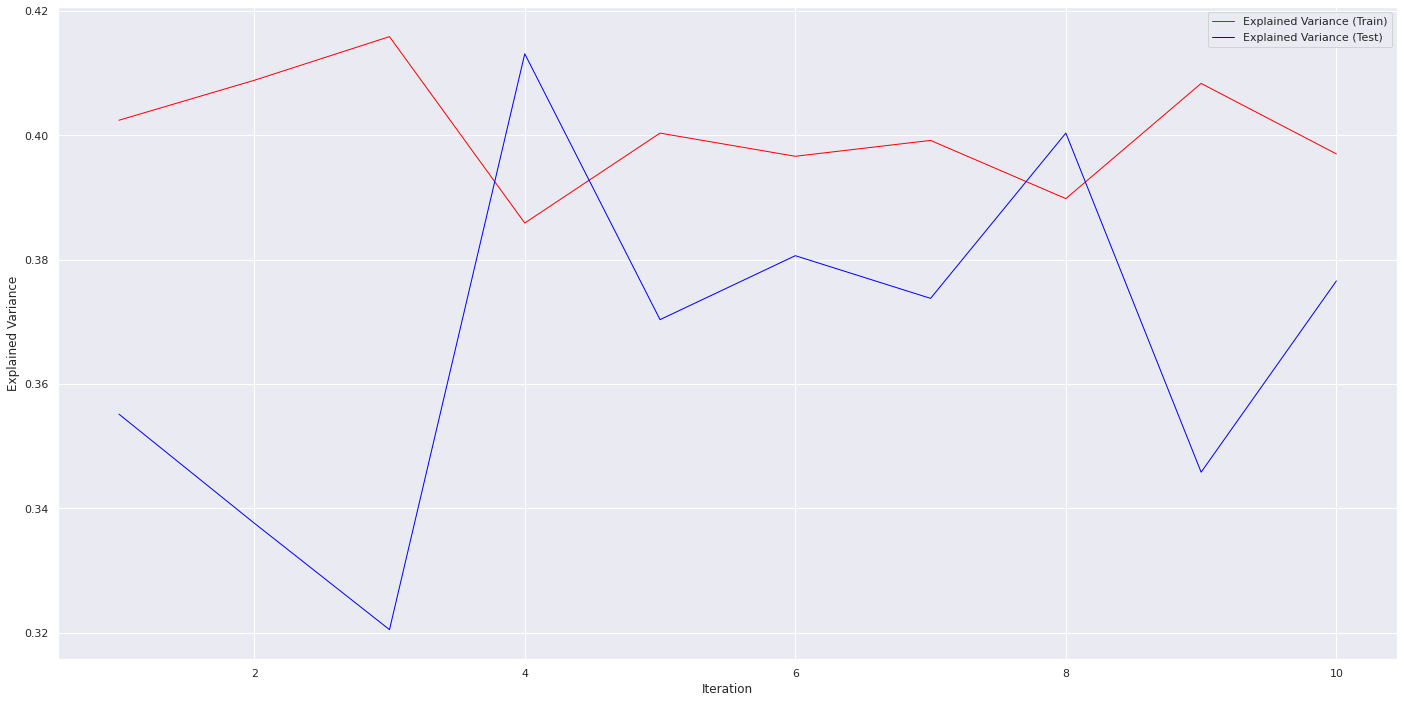

In [ ]:
# Check accuracy of model based on values of explained variance for test and train over 10 iterations
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list, 'w-', linewidth = 1, color = "red",label = "Explained Variance (Train)")
axes.set_xlabel("Iteration")
axes.set_ylabel("Explained Variance")
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list_test, 'w-', linewidth = 1,color = "blue",label = 'Explained Variance (Test)')
axes.legend(loc="upper left")
axes.legend()
plt.show()

## Using Random Forest Regression to Predict Price

**Random Forest Regression**

It is a supervised learning algorithm that uses ensemble learning method for regression, where it is a technique that combines predictions from multiple machine learning algorithms to make more accurate prediction. We will be using random forest regression to predict price of airbnb.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score as r2
from sklearn.metrics import mean_squared_error
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='squared_error', 
                               random_state=3, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2(y_train, y_train_pred),
        r2(y_test, y_test_pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE train: 2911.912, test: 5455.750
R^2 train: 0.637, test: 0.373


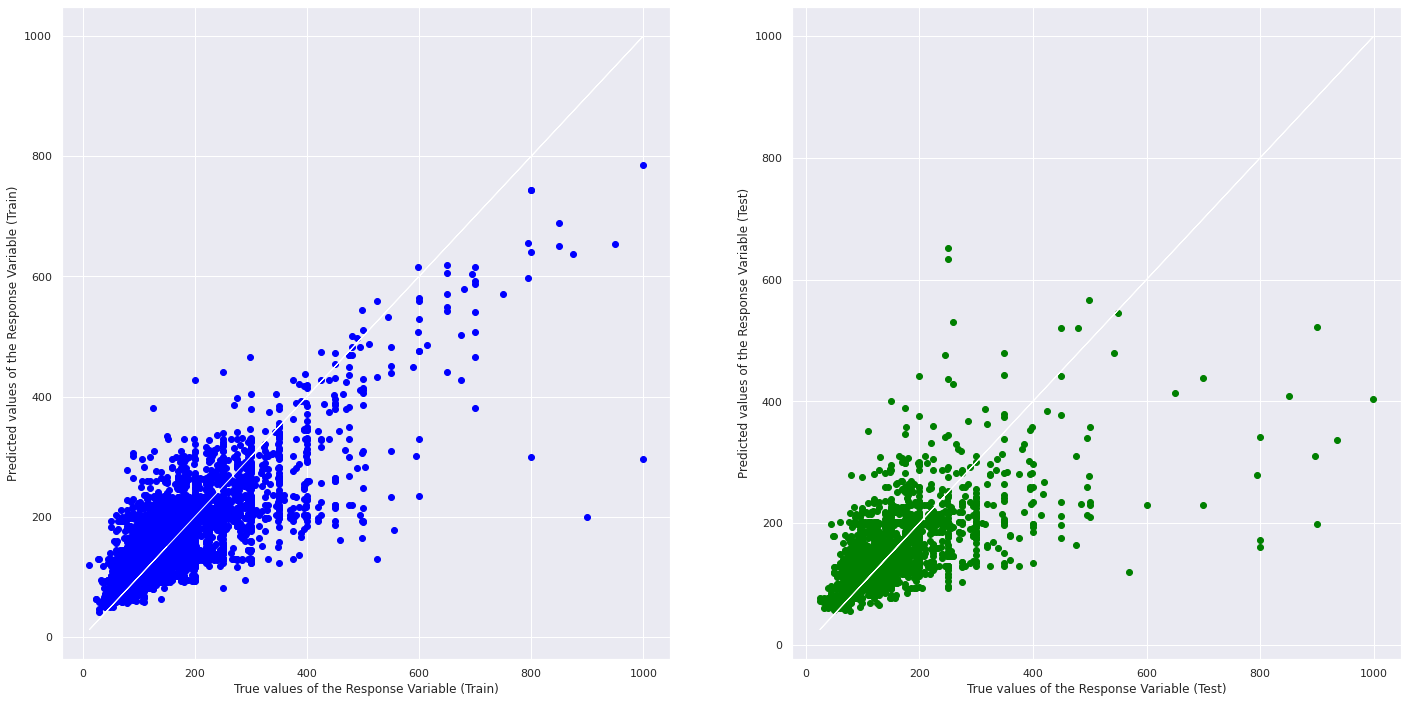

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed whe

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check value of explained variance for test and train over 10 iterations
R2_list = []
R2_list_test = []
num_iterations = 10

for i in range(0,num_iterations):
    # Split the Dataset into Train and Test
    predictors_train, predictors_test, response_train, response_test = train_test_split(X, y, test_size = 0.25)
    # train the linear regression model
    forest.fit(predictors_train, response_train)   
    # Predict Response corresponding to Predictors
    response_pred = forest.predict(predictors_train)
    response_pred_test = forest.predict(predictors_test)
                           
    R2_list.append(forest.score(predictors_train, response_train))
    R2_list_test.append(forest.score(predictors_test, response_test))

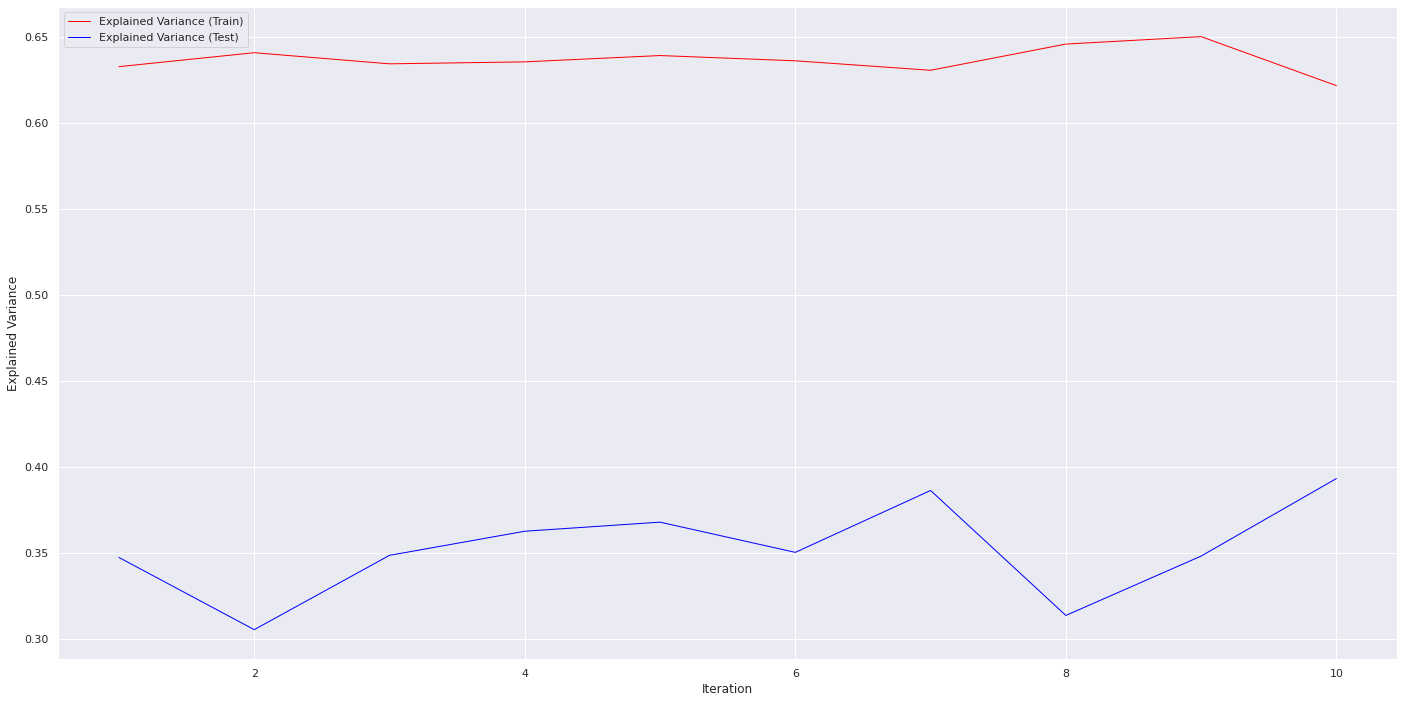

In [ ]:
# Check accuracy of model based on values of explained variance for test and train over 10 iterations
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list, 'w-', linewidth = 1, color = "red",label = "Explained Variance (Train)")
axes.set_xlabel("Iteration")
axes.set_ylabel("Explained Variance")
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list_test, 'w-', linewidth = 1,color = "blue",label = 'Explained Variance (Test)')
axes.legend(loc="upper left")
axes.legend()
plt.show()

##Using xgboost to Predict Price

**XGBoost**

XGBoost is the implementation of gradient boosted trees algorithm, where gradient boosting attempts to accurately predict a target variable by combining the estimates of a sets of simpler, weaker models. We used XGBoost algorithmn to help predict the price of airbnbs.

In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
booster = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.6, gamma=0.0, learning_rate=0.05, 
                           max_depth=7, n_estimators=200, random_state=6)

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# train
booster.fit(X_train, y_train)

# predict
y_train_pred = booster.predict(X_train)
y_test_pred = booster.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


Train Set : (6588, 1) (6588, 6)
Test Set  : (2196, 1) (2196, 6)
MSE train: 3497.131, test: 4748.026
R^2 train: 0.577, test: 0.406


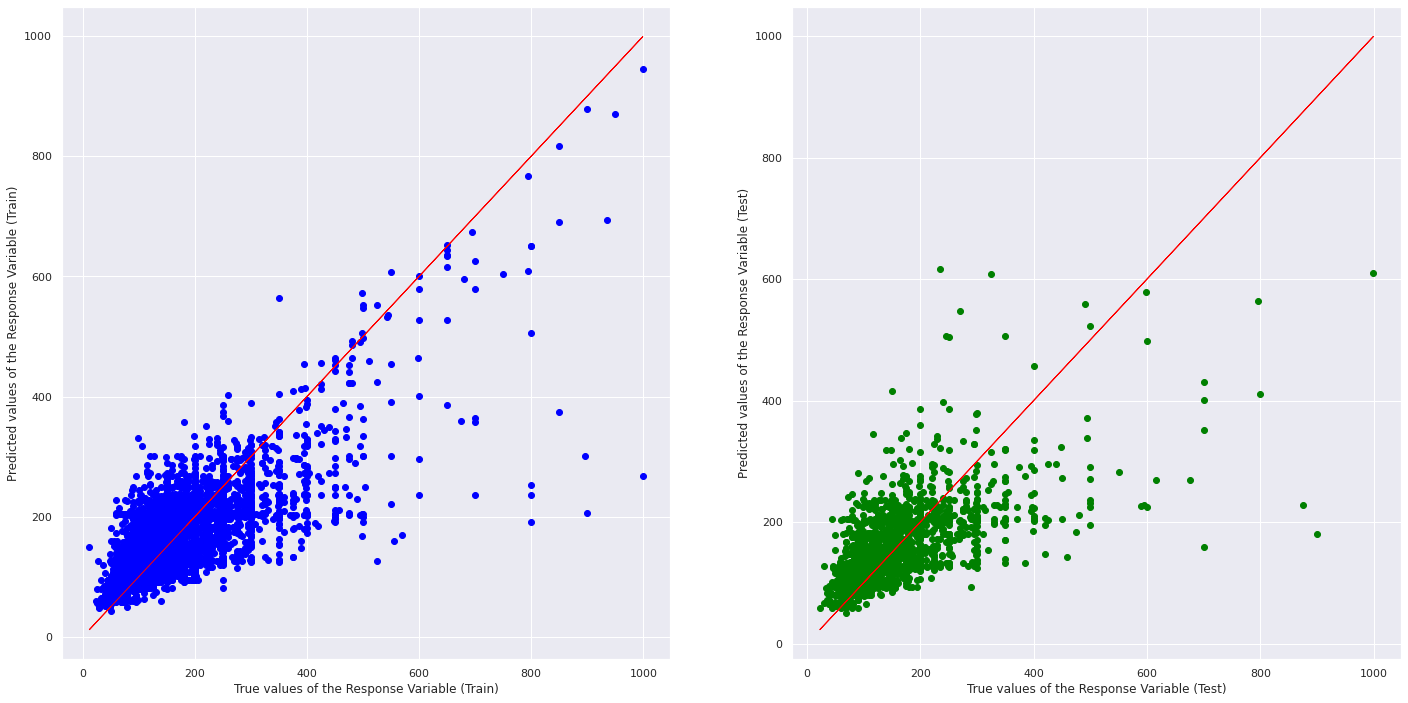

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color = 'red')
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check value of explained variance for test and train over 10 iterations
R2_list = []
R2_list_test = []
num_iterations = 10

for i in range(0,num_iterations):
    # Split the Dataset into Train and Test
    predictors_train, predictors_test, response_train, response_test = train_test_split(X, y, test_size = 0.25)
    # train the linear regression model
    booster.fit(predictors_train, response_train)   
    # Predict Response corresponding to Predictors
    response_pred = booster.predict(predictors_train)
    response_pred_test = booster.predict(predictors_test)
                           
    R2_list.append(booster.score(predictors_train, response_train))
    R2_list_test.append(booster.score(predictors_test, response_test))

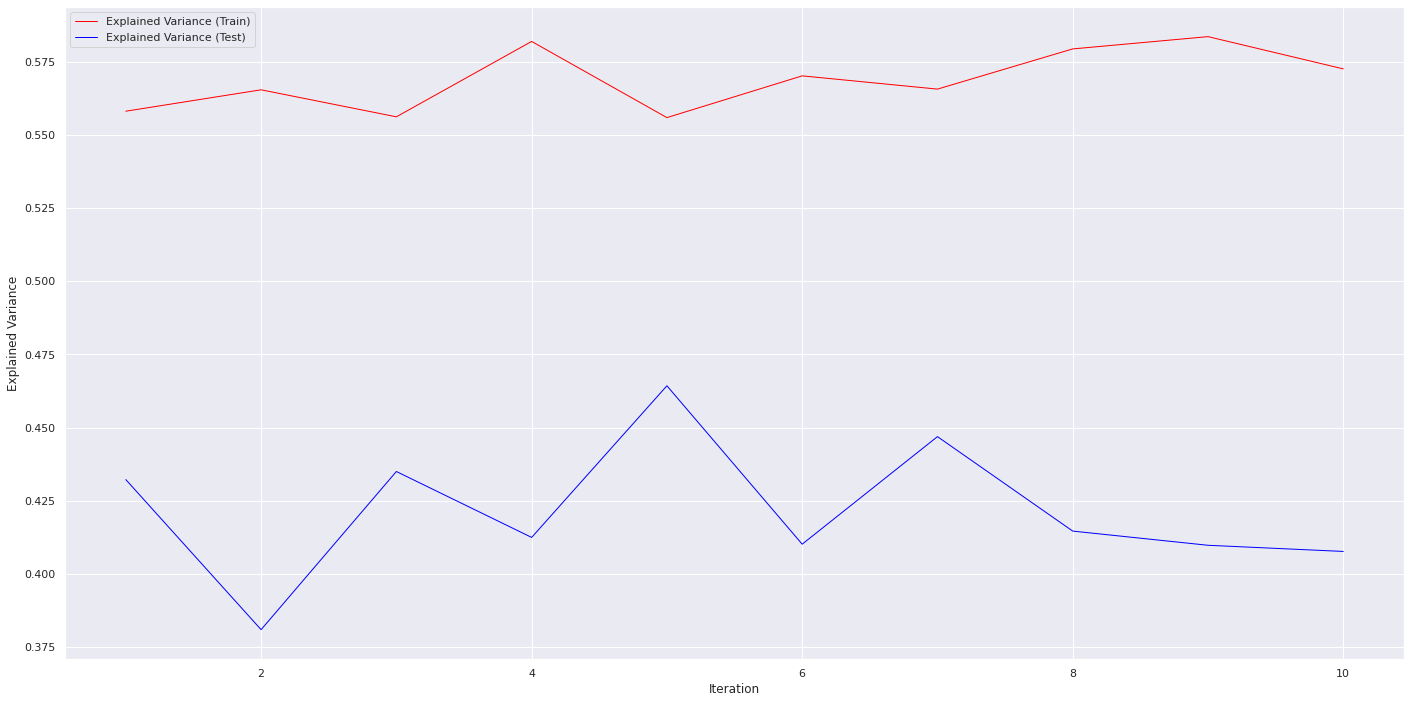

In [ ]:
# Check accuracy of model based on values of explained variance for test and train over 10 iterations
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list, 'w-', linewidth = 1, color = "red",label = "Explained Variance (Train)")
axes.set_xlabel("Iteration")
axes.set_ylabel("Explained Variance")
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list_test, 'w-', linewidth = 1,color = "blue",label = 'Explained Variance (Test)')
axes.legend(loc="upper left")
axes.legend()
plt.show()

**Comparing results:**

**Explained Variance**: Random Forest Regression >> XGBoost >> Linear Regression

Random Forest Regression has the least discrepancy between the model and the actual data. Hence, it is the most suitable to use to predict the prices for the Airbnb.

**Mean Square Error**: Random Forest Regression << XGBoost << Linear Regression

Random Forest Regression has the closest regression line to the set of data. 

**Conclusion**
Random Forest Regression has the lowest mean square error and the highest explained variance followed by xgboost and linear regression. Hence, random forest regression is the best model to predict price of airbnb with xgboost also being a good model and linear regression being the least favorable model.


# Q2: What is the ideal area for listings?

In [ ]:
cleanup_df=combined_data
#Extra data and drop NaN values'
temp_df = pd.DataFrame(combined_data[['bathrooms','bedrooms','beds','accommodates']])
temp_df = temp_df.astype("int64")
cleanup_df = pd.DataFrame(combined_data[['price','room_type','property_type','neighbourhood_cleansed','bed_type','cleaning_fee','guests_included','number_of_reviews']])
cleanup_df = pd.concat([cleanup_df,temp_df],axis=1)
cleanup_df = cleanup_df.dropna(how='any')

#Remove categories with low counts
propertytype = ["Tiny house","Nature lodge","Castle","Lighthouse","Campsite","Chalet","Casa particular (Cuba)","Hostel","Aparthotel","Barn","Hotel","Bungalow","Cabin","Cottage","Villa","Boutique hotel","Other","Guesthouse","Serviced apartment","Guest suite","Houseboat","Condominium"]
for ptype in propertytype:
    cleanup_df = cleanup_df[cleanup_df["property_type"]!=ptype]

#Remove categories with low counts 
neighbourhoodtype = ["Bijlmer-Oost","Gaasperdam - Driemond","De Aker - Nieuw Sloten","Bijlmer-Centrum","Osdorp"]
for ntype in neighbourhoodtype:
    cleanup_df = cleanup_df[cleanup_df["neighbourhood_cleansed"]!=ntype]

#Remove categories with low counts
cleanup_df = cleanup_df[cleanup_df["bed_type"]!="Airbed"]
cleanup_df = cleanup_df[cleanup_df["bed_type"]!="Couch"]

#Encode categorical data with numeric values
cleanup_df_dict = {"room_type":{"Entire home/apt": 3, "Private room": 2,"Shared room":1},
                   "property_type":{"Boat":2,"Loft":4,"Townhouse":1,"Bed and breakfast":5,"House":3,"Apartment":6},
                   "bed_type":{"Real Bed":2,"Futon":1,"Pull-out Sofa":1},
                   "neighbourhood_cleansed":{"Geuzenveld - Slotermeer": 0, "Noord-Oost":1,"IJburg - Zeeburgereiland":2,"Buitenveldert - Zuidas":3,"Noord-West":4, "Watergraafsmeer":5,"Slotervaart":6,"Oud-Noord":7,"Oostelijk Havengebied - Indische Buurt":8,"Bos en Lommer":9,"Oud-Oost":10,"Zuid":11,"Westerpark":12,"Centrum-Oost":13,"De Pijp - Rivierenbuurt":14,"Centrum-West":15,"De Baarsjes - Oud-West":16}}
                   
cleanup_df.replace(cleanup_df_dict, inplace=True)

cleanup_df_copy = cleanup_df




Encode the different regions of amsterdam to index from 0 to 16



Number of Neighbourhoods : 17
16    1685
15    1305
14    1175
13     891
12     698
10     566
11     561
9      521
8      396
7      254
6      156
5      143
4      113
3       91
1       90
2       78
0       61
Name: neighbourhood_cleansed, dtype: int64


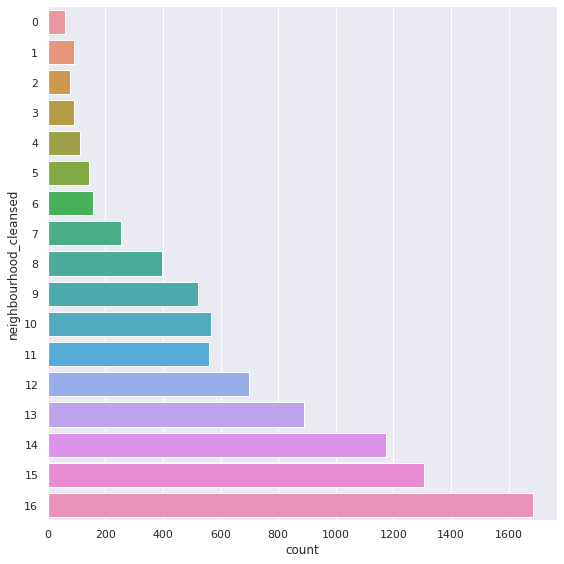

In [ ]:
print("Number of Neighbourhoods :", len(cleanup_df_copy["neighbourhood_cleansed"].unique()))
print(cleanup_df_copy["neighbourhood_cleansed"].value_counts())
sb.catplot(y = "neighbourhood_cleansed", data = cleanup_df_copy, kind = "count", height = 8)

## Visualising Listings On A Map

In [ ]:
import folium
from folium.plugins import HeatMap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


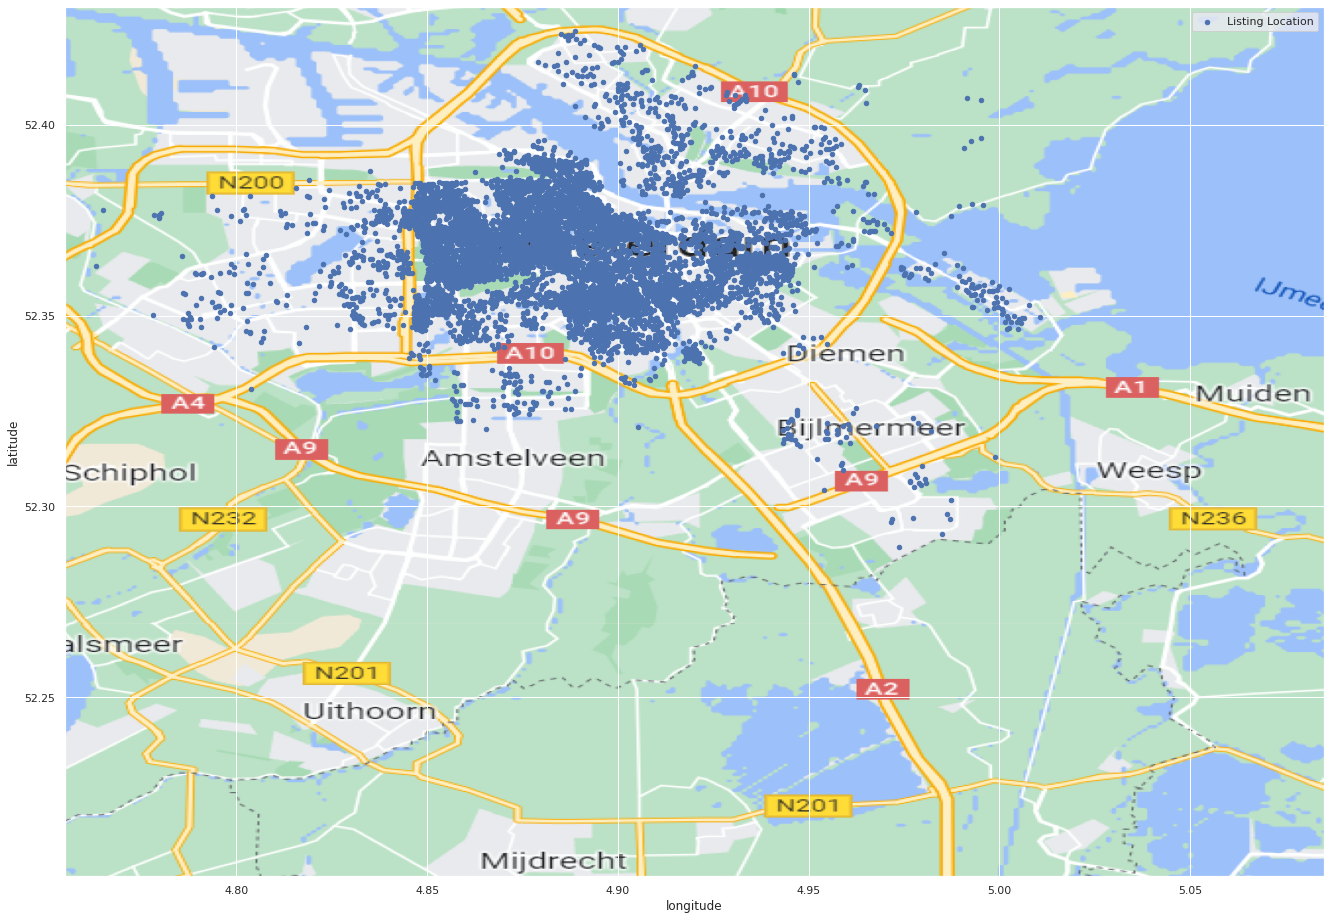

In [ ]:
map = plt.imread('gdrive/My Drive/SC1015/amsterdam.png')

BBox = (4.755, 5.085,52.203, 52.431)
plt.figure(figsize=(26,16))
plt.imshow(map,zorder=0,extent=BBox)
ax = plt.gca()

combined_data.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', 
              ax=ax)
# indicating price, but need to change a bit 

**Folium Function**

Using the function, we are able to clearly see the individual airbnb in amsterdam. It shows that the central region of amsterdam has many number of airbnbs and perhaps it is more popular and more ideal area.

## Visualising Price and Number of Reviews by Neighbourhood
Here we are using the number of reviews as an estimate for the number of customers because a person can only write a review if they have actually stayed in the house.

### Using Box Plots

[(0.0, 1000.0)]

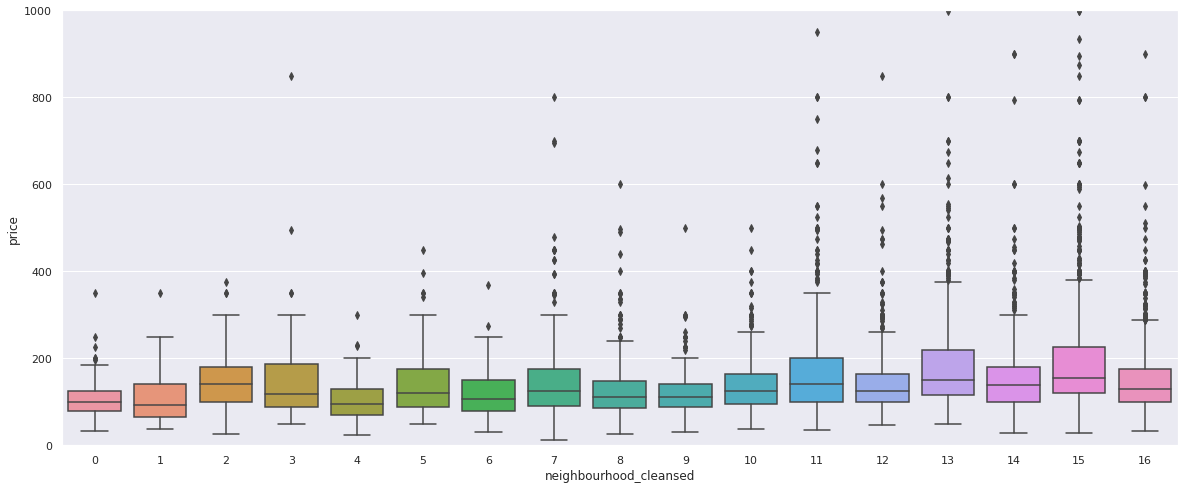

In [ ]:
f = plt.figure(figsize = (20,8))
ax = sb.boxplot(x="neighbourhood_cleansed", y="price", data=cleanup_df_copy)
ax.set(ylim=(0,1000))

[(0.0, 200.0)]

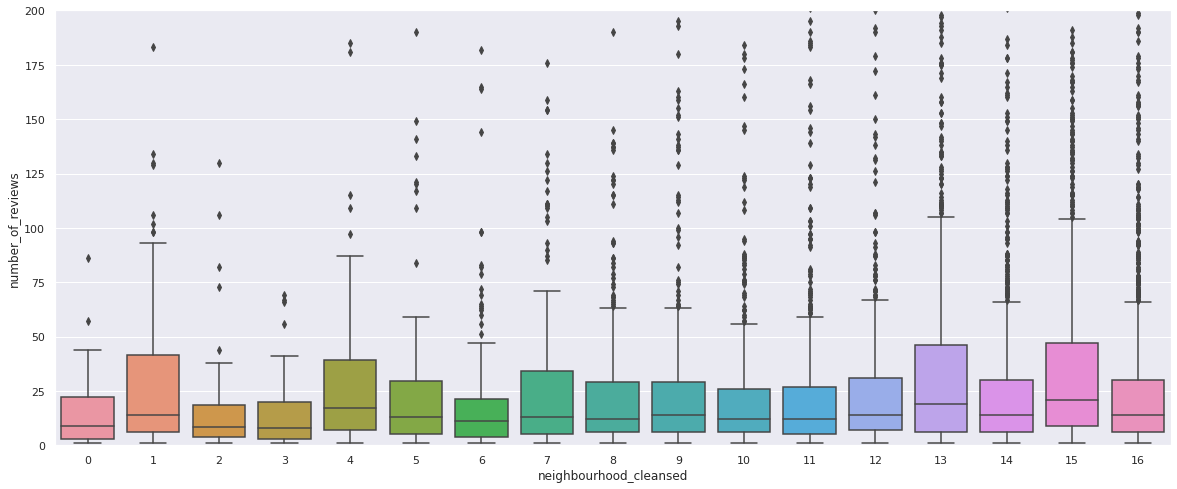

In [ ]:
# Boxplots against number of reviews
f = plt.figure(figsize = (20,8))
ax = sb.boxplot(x="neighbourhood_cleansed", y="number_of_reviews", data=cleanup_df)
ax.set(ylim=(0,200))

**Analysis**

Looking at both the diagram, we notice that regions 8 to 16 seems to have more outliers as compared to the other regions. One reason could be due to the fact that there are more data from those reasons.

### Sorting using groupby function

In [ ]:
# Using groupby function to check area against number of reviews (booking rate) and price
area = cleanup_df[['price', 'number_of_reviews', 'neighbourhood_cleansed']]

In [ ]:
sorted_area = area.groupby('neighbourhood_cleansed')
sorted_area.describe().head()

price                                              \
                        count        mean         std   min    25%    50%   
neighbourhood_cleansed                                                      
0                        61.0  111.655738   55.248495  32.0  80.00  100.0   
1                        90.0  105.955556   52.944302  38.0  65.75   93.5   
2                        78.0  149.884615   72.819646  26.0  99.00  140.0   
3                        91.0  152.527473  107.997051  50.0  89.00  119.0   
4                       113.0  104.123894   47.580596  23.0  70.00   95.0   

                                     number_of_reviews                        \
                          75%    max             count       mean        std   
neighbourhood_cleansed                                                         
0                       125.0  350.0              61.0  18.147541  33.143544   
1                       140.0  350.0              90.0  35.077778  50.844161   
2                       180.0  375.0              78.0  21.628205  43.954850   
3                       187.0  850.0              91.0  16.428571  28.169386   
4                       130.0  300.0             113.0  39.938053  62.851907   

                                                       
                        min   25%   50%    75%    max  
neighbourhood_cleansed                                 
0                       1.0  3.00   9.0  22.00  241.0  
1                       1.0  6.25  14.0  41.50  310.0  
2                       1.0  4.00   8.5  18.75  281.0  
3                       1.0  3.00   8.0  20.00  243.0  
4                       1.0  7.00  17.0  39.00  323.0

In [ ]:
# Sort by mean price of each area
sorted_area.mean().sort_values(by="price",ascending=False)

price  number_of_reviews
neighbourhood_cleansed                               
15                      189.909579          40.525670
13                      181.482604          40.870932
11                      174.625668          27.964349
7                       155.055118          29.685039
14                      155.018723          28.562553
3                       152.527473          16.428571
2                       149.884615          21.628205
16                      146.518101          28.033234
12                      144.484241          27.050143
10                      138.190813          24.227915
5                       137.489510          26.419580
8                       127.032828          29.886364
6                       118.211538          25.711538
9                       117.909789          27.017274
0                       111.655738          18.147541
1                       105.955556          35.077778
4                       104.123894          39.938053

In [ ]:
sorted_area.mean().sort_values(by="number_of_reviews",ascending=False)

price  number_of_reviews
neighbourhood_cleansed                               
13                      181.482604          40.870932
15                      189.909579          40.525670
4                       104.123894          39.938053
1                       105.955556          35.077778
8                       127.032828          29.886364
7                       155.055118          29.685039
14                      155.018723          28.562553
16                      146.518101          28.033234
11                      174.625668          27.964349
12                      144.484241          27.050143
9                       117.909789          27.017274
5                       137.489510          26.419580
6                       118.211538          25.711538
10                      138.190813          24.227915
2                       149.884615          21.628205
0                       111.655738          18.147541
3                       152.527473          16.428571

Neighbourhoods 13 and 15 see both the highest number of reviews and price for stay, making them good areas for putting up listings. There are many listings in total in these areas as well, showing that these areas may be more popular.

#Q3: What factors affect the number of bookings?

In [ ]:
columns_to_keep = ['id', 'price', 'neighbourhood_cleansed', 'latitude', 'longitude',
                  'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'security_deposit', 'cleaning_fee',
                  'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy']
listings_amenities_df = notesData[columns_to_keep].set_index('id')
listings_amenities_df = listings_amenities_df.dropna()
listings_amenities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11963 entries, 2818 to 30525429
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   11963 non-null  object 
 1   neighbourhood_cleansed  11963 non-null  object 
 2   latitude                11963 non-null  float64
 3   longitude               11963 non-null  float64
 4   property_type           11963 non-null  object 
 5   room_type               11963 non-null  object 
 6   accommodates            11963 non-null  int64  
 7   bathrooms               11963 non-null  float64
 8   bedrooms                11963 non-null  float64
 9   beds                    11963 non-null  float64
 10  amenities               11963 non-null  object 
 11  security_deposit        11963 non-null  object 
 12  cleaning_fee            11963 non-null  object 
 13  guests_included         11963 non-null  int64  
 14  extra_people            11963 no

###Sorting the column "amenities" with Counter function
We used this function to count the individual amenities that the airbnb provides for hosts to determine what they should include in their airbnb.

In [ ]:
from collections import Counter

In [ ]:
results = Counter()
listings_amenities_df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(40)

[('Wifi', 11628),
 ('Heating', 11622),
 ('Essentials', 11597),
 ('Kitchen', 10937),
 ('Smoke detector', 9767),
 ('TV', 9578),
 ('Washer', 9112),
 ('Hangers', 9066),
 ('Laptop friendly workspace', 8760),
 ('Hair dryer', 8453),
 ('Iron', 8444),
 ('Shampoo', 8341),
 ('Hot water', 6422),
 ('Family/kid friendly', 5741),
 ('Fire extinguisher', 5503),
 ('Dryer', 5500),
 ('Cable TV', 5177),
 ('Carbon monoxide detector', 5047),
 ('First aid kit', 4714),
 ('Internet', 4548),
 ('Host greets you', 4342),
 ('Refrigerator', 4010),
 ('Bed linens', 3962),
 ('Dishes and silverware', 3853),
 ('Private entrance', 3523),
 ('Coffee maker', 3493),
 ('Oven', 3430),
 ('Paid parking off premises', 3394),
 ('Stove', 3379),
 ('Cooking basics', 3311),
 ('Dishwasher', 3118),
 ('translation missing: en.hosting_amenity_50', 3089),
 ('Microwave', 2777),
 ('Patio or balcony', 2401),
 ('translation missing: en.hosting_amenity_49', 2331),
 ('Luggage dropoff allowed', 2061),
 ('Buzzer/wireless intercom', 1900),
 ('Step-f

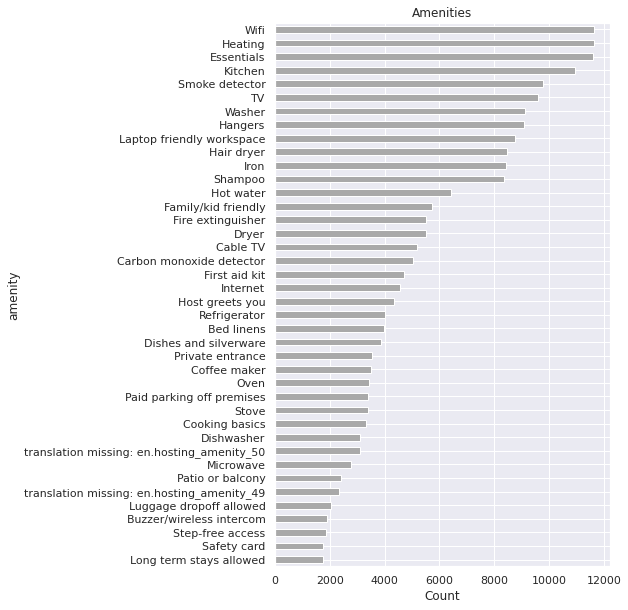

In [ ]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(40), columns=['amenity', 'count'])
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(6,10), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

**Analysis**

Looking at the diagram, we can see that the most common ammenity would be Wifi followed by heating. As such host can consider to include these ammenities in their airbnb to remain competitive so that they do not lose out to other competitors.

### Identifying Popular Characteristics Using a Wordcloud
We use a wordcloud to identify which words come up often in reviews by airbnb guests, using this to identify characteristics that a host could capitalise on to make their property more popular.

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
reviews_df = pd.read_csv('gdrive/My Drive/SC1015/reviews_details.csv')

In [ ]:
with open('comments.txt','w',encoding='utf-8') as f:
    f.writelines(reviews_df.comments.astype('str'))

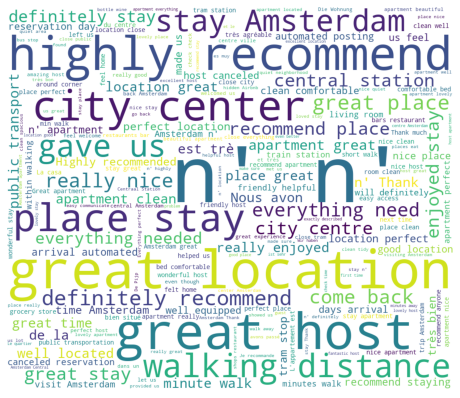

In [ ]:
with open('comments.txt','r',encoding='utf-8') as f:
  data = f.readlines()

wc = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(str(data))

plt.figure(figsize=(8,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('comments.png')

**Conclusion**

Hosts can identify what are the important items/accessory that they should include in their airbnb. The most common one would be whether Wifi was provided, followed by heating. Hosts can consider including this in their airbnb to remain competitive such that they can gather better reviews such as being "highly recommended", "great host".

On the other hand, hosts can identity items that may not be as important such as microwave.They can consider to not include it in their airbnb.

# Q4: What rating would a listing get?

In [ ]:
num_review = pd.DataFrame(data = num_data, columns = ["review_scores_rating","review_scores_accuracy",\
                                                    "review_scores_cleanliness","review_scores_checkin","review_scores_communication",\
                                                    "review_scores_location","review_scores_value"])
#Convert review_scores_accuracy back to numeric
num_review = num_review.astype("float64")
#Correlation between numeric variables
num_review.corr()

review_scores_rating  review_scores_accuracy  \
review_scores_rating                     1.000000                0.704388   
review_scores_accuracy                   0.704388                1.000000   
review_scores_cleanliness                0.675016                0.554571   
review_scores_checkin                    0.590386                0.511476   
review_scores_communication              0.663521                0.559866   
review_scores_location                   0.338596                0.292356   
review_scores_value                      0.680785                0.564817   

                             review_scores_cleanliness  review_scores_checkin  \
review_scores_rating                          0.675016               0.590386   
review_scores_accuracy                        0.554571               0.511476   
review_scores_cleanliness                     1.000000               0.407231   
review_scores_checkin                         0.407231               1.000000   
review_scores_communication                   0.435105               0.673573   
review_scores_location                        0.273419               0.269607   
review_scores_value                           0.534370               0.460285   

                             review_scores_communication  \
review_scores_rating                            0.663521   
review_scores_accuracy                          0.559866   
review_scores_cleanliness                       0.435105   
review_scores_checkin                           0.673573   
review_scores_communication                     1.000000   
review_scores_location                          0.268001   
review_scores_value                             0.495866   

                             review_scores_location  review_scores_value  
review_scores_rating                       0.338596             0.680785  
review_scores_accuracy                     0.292356             0.564817  
review_scores_cleanliness                  0.273419             0.534370  
review_scores_checkin                      0.269607             0.460285  
review_scores_communication                0.268001             0.495866  
review_scores_location                     1.000000             0.363309  
review_scores_value                        0.363309             1.000000

**Comparing reviews rating with other aspects of reviews**

There seems be a generally strong relationship between all the reviews as a good review in one aspect would generally mean a good review in another. Score accuracy, cleaniness, value and communication have generally a strong correlation with review score rating. While, only location seem to have a poor correlation with rating.

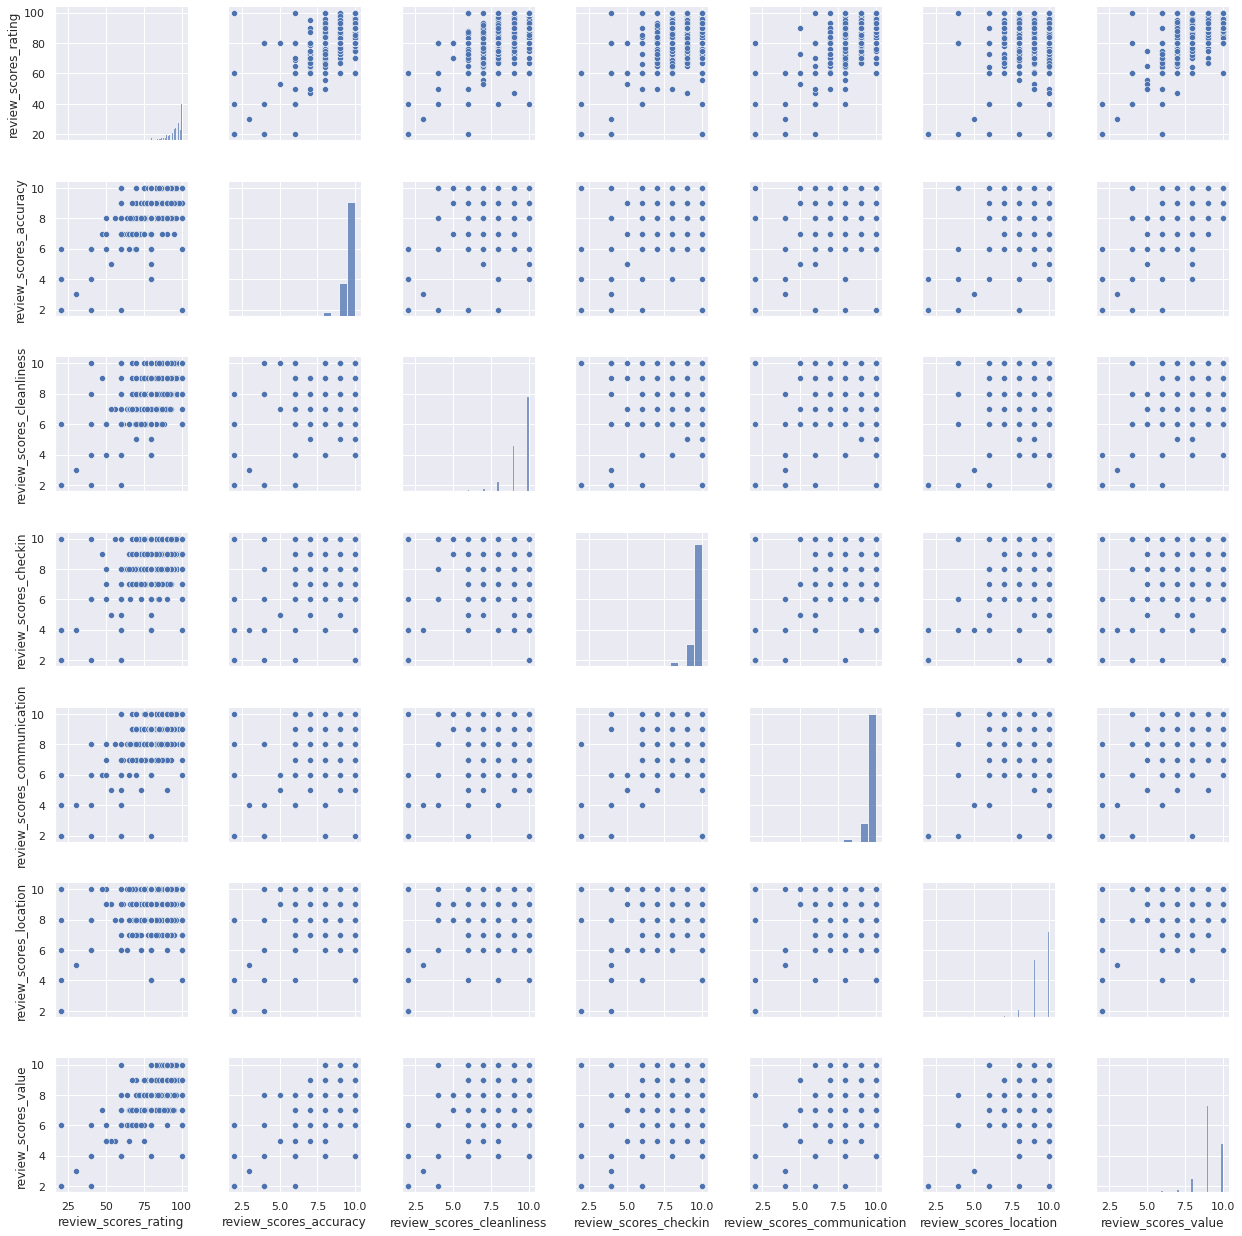

In [ ]:
#plot num data
sb.pairplot(num_review)

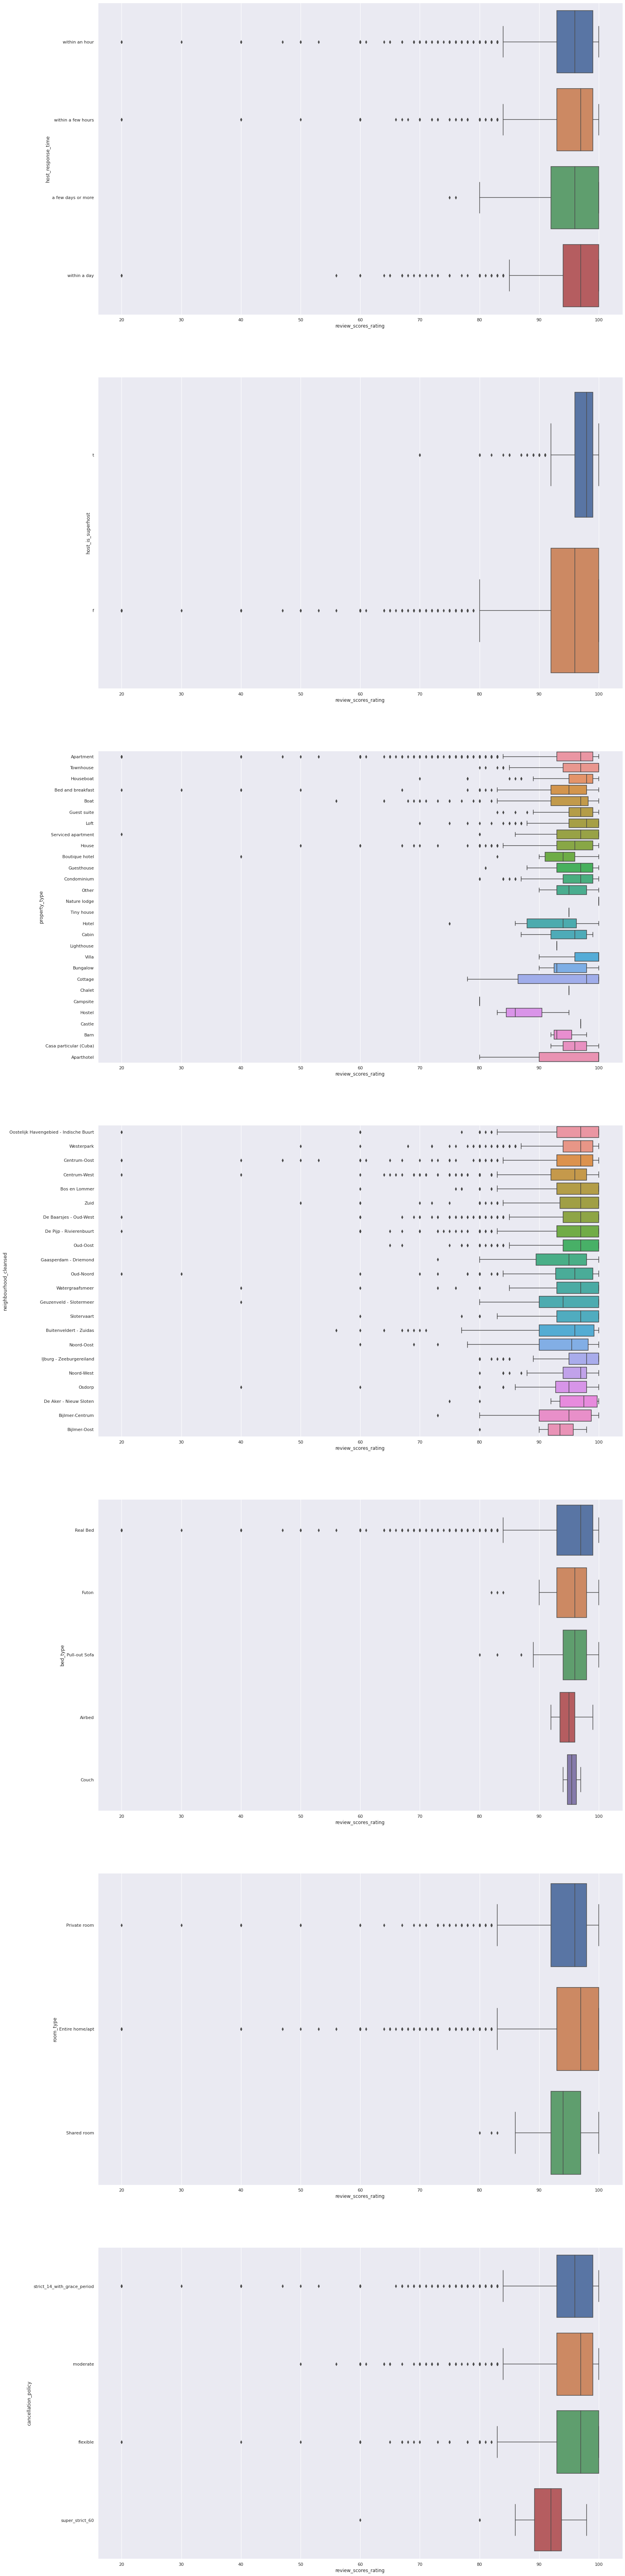

In [ ]:
#Visualise categorical variables with review_scores_rating
#Boxplots for all categorical variables against the review_scores_rating
#Create list of categorical variables
cat_list = []
for var in cat_data:
    cat_list.append(var)
count = 0
f, axes = plt.subplots(7, 1, figsize=(24,120))
for var in cat_list:
    sb.boxplot(x = 'review_scores_rating', y = var, data = combined_data, ax = axes[count])
    count+=1


**Analysis**



*   Host Response Time

The mean rating for host that respond within a few hours is surprisingly higher than the mean rating for host that respond within an hour. In fact, there seems to be more outliers that fall in the first quartile for host that respond in the first hour.
One possible reason could be people looking for airbnb usually look for it in advance and the difference between a few hours is negligible

*   Host is a superhost

Not surprisingly, host who are superhost have a mean rating higher than host who are not. Hence, host should aim to be a superhost to ensure a higher rating.



*   Type of Property

Generally the mean ratings of airbnb are similar to one another with a few exception of the property type castle which has a significantlly lower mean rating.
*   Type of Bed

The mean ratings are similar to one another but the bottom two would be couch and airbed. Hence, most customers are okay with "Real Bed" and "Futon" while some does not prefer "Couch" and "Airbed".



*   Type of Room

Private room and the entire home has higher mean rating as compared to shared room. This could be a factor that customers look for as they might not want to share their living space with someone else.




*   Cancellation Policy

From the data, the host which is super strict has the lowest mean ratings as compared to the others. This implies that customers prefer hosts who are more if not slightly flexible with their bookings or even giving customers a grace period for cancelling. This could be due to the fact that most customers are visiting amsterdam and plans might change so they would prefer a more flexible host

**Conclusion**

Host can gather from the data the different aspects that they should incorperate into their airbnb. They can also gather certain characteristics that customers may not like. Hence, these factors can affect the ratings that a listing get.





In [ ]:
num_data = pd.DataFrame(data = combined_data, columns = ["review_scores_rating","review_scores_accuracy",\
                                                    "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"])
#Convert review_scores_accuracy back to numeric
num_data = num_data.astype("float64")
response_data = pd.DataFrame(num_data["review_scores_rating"])
predictors_data = pd.DataFrame(data = num_data, columns = ["review_scores_accuracy",\
        "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_value"])
num_data.info()
num_data.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497 entries, 0 to 20007
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         9497 non-null   float64
 1   review_scores_accuracy       9497 non-null   float64
 2   review_scores_cleanliness    9497 non-null   float64
 3   review_scores_checkin        9497 non-null   float64
 4   review_scores_communication  9497 non-null   float64
 5   review_scores_location       9497 non-null   float64
 6   review_scores_value          9497 non-null   float64
dtypes: float64(7)
memory usage: 851.6 KB


review_scores_rating  review_scores_accuracy  \
review_scores_rating                     1.000000                0.704388   
review_scores_accuracy                   0.704388                1.000000   
review_scores_cleanliness                0.675016                0.554571   
review_scores_checkin                    0.590386                0.511476   
review_scores_communication              0.663521                0.559866   
review_scores_location                   0.338596                0.292356   
review_scores_value                      0.680785                0.564817   

                             review_scores_cleanliness  review_scores_checkin  \
review_scores_rating                          0.675016               0.590386   
review_scores_accuracy                        0.554571               0.511476   
review_scores_cleanliness                     1.000000               0.407231   
review_scores_checkin                         0.407231               1.000000   
review_scores_communication                   0.435105               0.673573   
review_scores_location                        0.273419               0.269607   
review_scores_value                           0.534370               0.460285   

                             review_scores_communication  \
review_scores_rating                            0.663521   
review_scores_accuracy                          0.559866   
review_scores_cleanliness                       0.435105   
review_scores_checkin                           0.673573   
review_scores_communication                     1.000000   
review_scores_location                          0.268001   
review_scores_value                             0.495866   

                             review_scores_location  review_scores_value  
review_scores_rating                       0.338596             0.680785  
review_scores_accuracy                     0.292356             0.564817  
review_scores_cleanliness                  0.273419             0.534370  
review_scores_checkin                      0.269607             0.460285  
review_scores_communication                0.268001             0.495866  
review_scores_location                     1.000000             0.363309  
review_scores_value                        0.363309             1.000000

**Analysis**

From the data it could be seen that generally all the different factors of reviews are correlated to reviews_scores_rating with the exception of review_score_location. From the data alone, we can infer that the location of airbnb may not be a strong contributing factor to the review_score_ratings. However, in reality, we believe that location of the airbnb still affects and the data does not seem to coincide with our ideas.

## Predicting ratings using random forest regression

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


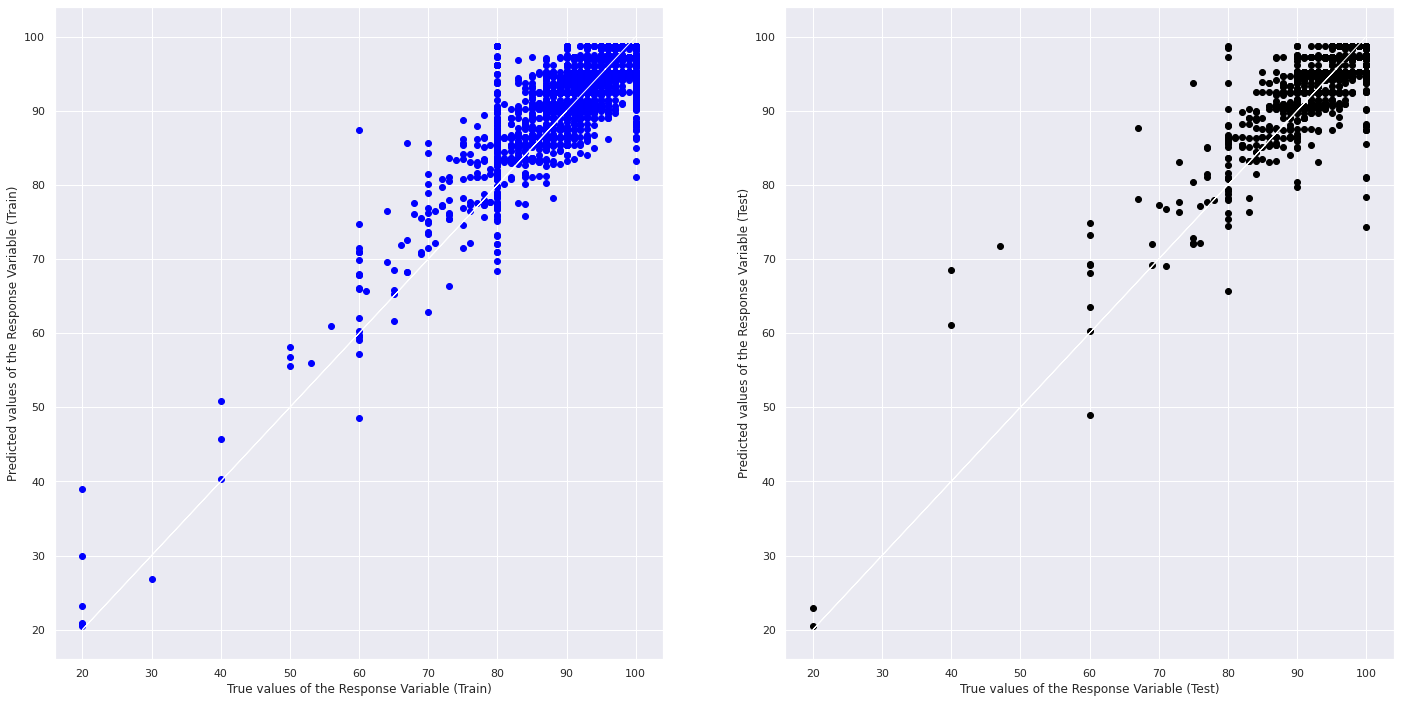

Goodness of Fit of Model (Train) )
Explained Variance (R^2) 	: 0.7577986484809245
Mean Squared Error (MSE) 	: 9.146769316792282

Goodness of Fit of Model (Test) )
Explained Variance (R^2) 	: 0.7305323322268683
Mean Squared Error (MSE) 	: 11.12199351606679



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed whe

In [ ]:
# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, response_train, response_test = train_test_split(predictors_data, response_data, test_size = 0.2)

#source for grid search: https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
#Obtain an optimal "max_depth" (maximum tree depth) and "n_estimators" (number of trees) by minimising cost function
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

grid_result = gsc.fit(predictors_train, response_train)
best_params = grid_result.best_params_

#define regression model using the max_depth and n_estimators obtained 
reg = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=0)                            
#fit model
reg.fit(predictors_train, response_train)
#predict ratings values. Returns an array of predicted ratings
response_pred = reg.predict(predictors_train)
response_pred_test = reg.predict(predictors_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(response_train, response_pred, color = "blue")
axes[0].plot(response_train, response_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(response_test, response_pred_test, color = "black")
axes[1].plot(response_test, response_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model (Train) )")
print("Explained Variance (R^2) \t:", reg.score(predictors_train, response_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(response_train, response_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model (Test) )")
print("Explained Variance (R^2) \t:", reg.score(predictors_test, response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(response_test, response_pred_test))
print()

# Check value of explained variance for test and train over 10 iterations
R2_list = []
R2_list_test = []
num_iterations = 10

for i in range(0,num_iterations):
    # Split the Dataset into Train and Test
    predictors_train, predictors_test, response_train, response_test = train_test_split(predictors_data, response_data, test_size = 0.2)
    # train the linear regression model
    reg.fit(predictors_train, response_train)   
    # Predict Response corresponding to Predictors
    response_pred = reg.predict(predictors_train)
    response_pred_test = reg.predict(predictors_test)
                           
    R2_list.append(reg.score(predictors_train, response_train))
    R2_list_test.append(reg.score(predictors_test, response_test))

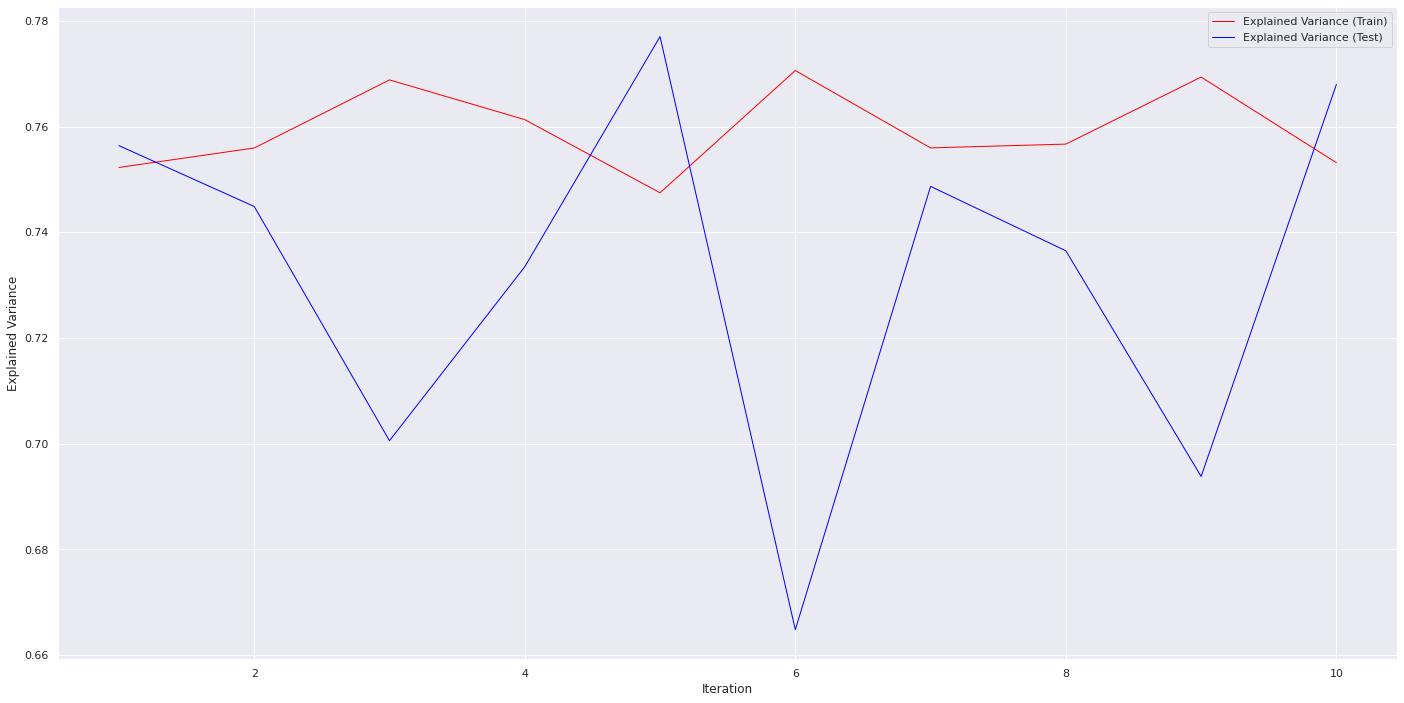

In [ ]:
# Check accuracy of model based on values of explained variance for test and train over 10 iterations
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list, 'w-', linewidth = 1, color = "red",label = "Explained Variance (Train)")
axes.set_xlabel("Iteration")
axes.set_ylabel("Explained Variance")
axes.plot(np.array(np.arange(1,num_iterations+1)), R2_list_test, 'w-', linewidth = 1,color = "blue",label = 'Explained Variance (Test)')
axes.legend(loc="upper left")
axes.legend()
plt.show()

In [ ]:
#Model can be used to predict review_scores_rating with array of predictor values
print("predicted review_scores_rating for various values of predictors")
print(reg.predict([[9,8,9,7,9]]))

#predict review_scores_rating for entire dataset
response_pred = reg.predict(predictors_train)
#Create dataframe of predicted review_scores_rating
test_pred=pd.DataFrame(response_pred)
#Change label of predicted review_scores_rating
test_pred=test_pred.rename(columns={0:"predicted"})
#Concatenate dataframes to show predictor values, review_scores_rating values, and predicted review_scores_rating
test_pred = pd.concat([predictors_data,response_data,test_pred],axis=1)
test_pred.describe()

predicted review_scores_rating for various values of predictors
[87.51831293]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


review_scores_accuracy  review_scores_cleanliness  \
count             9497.000000                9497.000000   
mean                 9.699484                   9.507634   
std                  0.625080                   0.778536   
min                  2.000000                   2.000000   
25%                 10.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            9497.000000                  9497.000000   
mean                9.752553                     9.795830   
std                 0.625095                     0.582054   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_value  review_scores_rating    predicted  
count          9497.000000           9497.000000  7597.000000  
mean              9.169211             95.069074    95.097399  
std               0.756402              6.202738     5.166699  
min               2.000000             20.000000    20.684619  
25%               9.000000             93.000000    94.063939  
50%               9.000000             97.000000    97.218074  
75%              10.000000             99.000000    98.485700  
max              10.000000            100.000000    98.770448

## Predict ratings using linear regression

Intercept of Regression 	: b =  [-1.44464841]
Coefficients of Regression 	: a =  [[2.42736946 2.20406924 0.93141888 2.5256212  1.98149556]]

                    Predictors  Coefficients
0       review_scores_accuracy      2.427369
1    review_scores_cleanliness      2.204069
2        review_scores_checkin      0.931419
3  review_scores_communication      2.525621
4          review_scores_value      1.981496



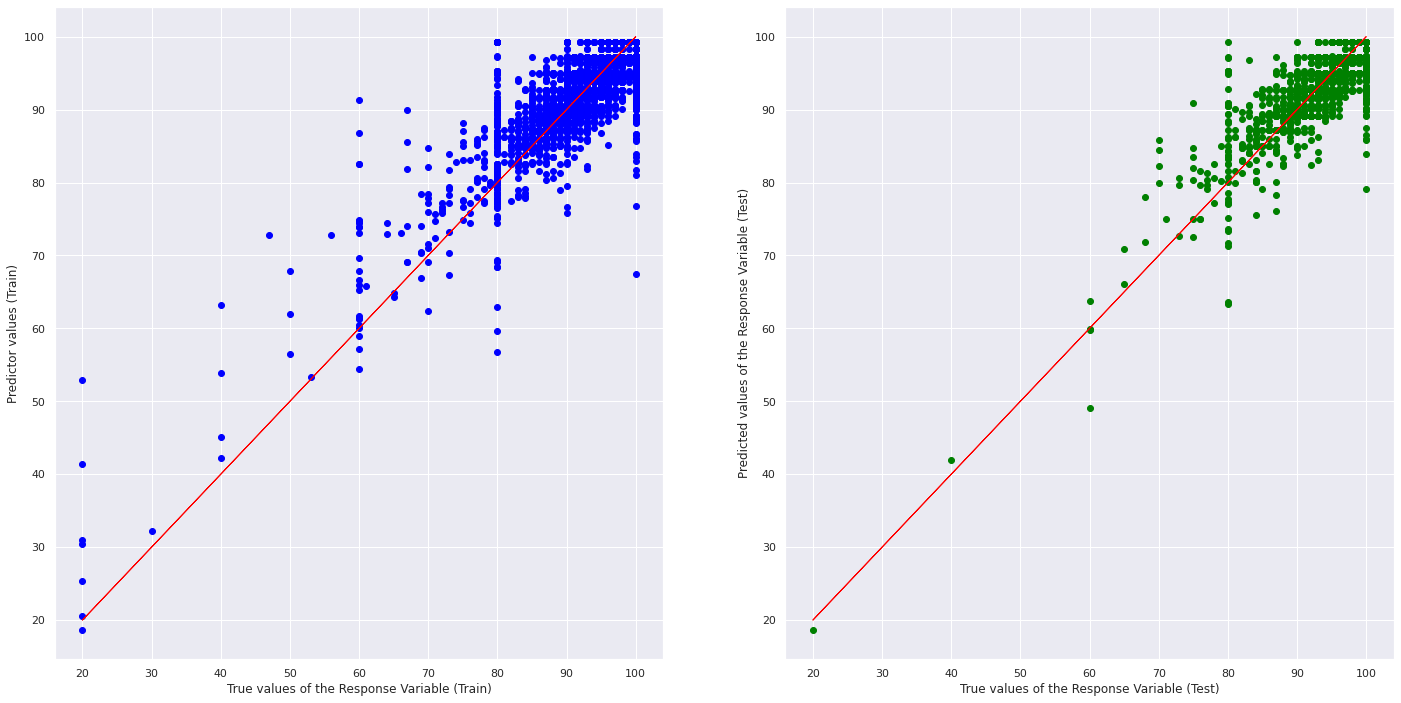

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7301210970687606
Mean Squared Error (MSE) 	: 10.80648824246908

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7075262495451431
Mean Squared Error (MSE) 	: 9.872206663088276

Average values over 10 iterations
R^2_train :  0.7247368245338024
R^2_test :  0.724210836665027
MSE_train :  10.486556651487419
MSE_test :  10.906270597154805


In [ ]:
#Comparing random forest model with linear regression model
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression() 

# Split the Dataset into Train and Test
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors_data, response_data, test_size = 0.25)

# train the linear regression model
linreg.fit(predictors_train, response_train)   

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()



# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(predictors_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
response_train_pred = linreg.predict(predictors_train)
response_test_pred = linreg.predict(predictors_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(response_train, response_train_pred, color = "blue")
axes[0].plot(response_train, response_train, 'w-', linewidth = 1, color = "red")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predictor values (Train)")
axes[1].scatter(response_test, response_test_pred, color = "green")
axes[1].plot(response_test, response_test, 'w-', linewidth = 1,color = "red")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(predictors_train, response_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(response_train, response_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(predictors_test, response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(response_test, response_test_pred))
print()

#the order of costs are explained variance for train and test, and mse for train and test
cost_linreg = {"R^2_train":0,"R^2_test":0,"MSE_train":0,"MSE_test":0}
R2_list = []
R2_list_test = []
num_iterations = 10

for i in range(0,num_iterations):
    # Split the Dataset into Train and Test
    predictors_train, predictors_test, response_train, response_test = train_test_split(predictors_data, response_data, test_size = 0.2)
    # train the linear regression model
    linreg.fit(predictors_train, response_train)   
    # Predict Response corresponding to Predictors
    response_train_pred = linreg.predict(predictors_train)
    response_test_pred = linreg.predict(predictors_test)
                           
    cost_linreg["R^2_train"]+=(linreg.score(predictors_train, response_train))
    cost_linreg["MSE_train"]+=(mean_squared_error(response_train, response_train_pred))
    R2_list.append(linreg.score(predictors_train, response_train))

    cost_linreg["R^2_test"]+=(linreg.score(predictors_test, response_test))
    cost_linreg["MSE_test"]+=(mean_squared_error(response_test, response_test_pred))
    R2_list_test.append(linreg.score(predictors_test, response_test))
print("Average values over 10 iterations")
for var in cost_linreg:
    cost_linreg[var]/=10
    print(var,": ",cost_linreg[var])


**Analysis**

Both the linear regression model and the random forest regression had high explained variance and hence both had minimal discrepancy of the predicted data and the actual data. Thus, both models could be used to predict the ratings that airbnb host will get with all the different factors.

# Conclusion

We want an airbnb host to be able to make the most of their property and ensure that their listings are successful. From our project, we have a few suggestions for them. 

Firstly, based on the characteristics of their property, they should be able to predict a typical price of a similar property and be able to price their property appropriately. 

Second, for a host looking to put up a listing in Amsterdam, some of the best areas to put up listings will be "Centrum-Oost" and "Centrum-West". These areas are the most popular and also fetch the highest prices. However there are also the most listings in these areas. If they wish to offer a listing in somewhere with less competition, "Oud-Noord" would be a good choice, ranking relatively highly in popularity and price. They should avoid regions like "Geuzenveld - Slotermeer" as it ranks very poorly in both price and number of reviews.

Thirdly, the location of the listing is extremely important to guests. To make sure their listing is popular, they should get properties that are near the city center and within walking distance to amenities. A good host is also important to guests. 

Finally, they will also be able to predict how high a rating they would get based on the characteristics of their property and possibly aim to improve it. 
